## Jsons to dataframe

In [113]:
# All imports

import os
import json
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import wordcloud as wc
import matplotlib.pyplot as plt

In [377]:
# Set the directory containing the JSON files
json_dir = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/Aug_2023_app_individual_jsons"

# Initialize an empty list to store the extracted data
data = []

# Iterate over the JSON files in the directory
for file_name in os.listdir(json_dir):
    if file_name.endswith(".json"):
        file_path = os.path.join(json_dir, file_name)
        
        # Read the JSON file
        with open(file_path, "r") as file:
            json_data = json.load(file)
        
        # Extract the attributes dynamically
        attributes = json_data.keys()
        
        # Create a dictionary to store the extracted data
        row_data = {}
        for attr in attributes:
            row_data[attr] = json_data.get(attr)
        
        # Append the extracted data dictionary to the list
        data.append(row_data)

# Create a DataFrame from the extracted data
apple_apps_14july2023 = pd.DataFrame(data)

# Save the DataFrame as a CSV file
csv_file_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_16Aug2023.csv" #change the name of the csv file here
apple_apps_14july2023.to_csv(csv_file_path, index=False)


In [114]:
# import pandas as pd

# Path to the CSV file
csv_file = 'apple_apps_16Aug2023.csv' #change the name of the csv file here

# Read the CSV file into a DataFrame
apple_df = pd.read_csv(csv_file)

# Display the DataFrame
print(apple_df)


                                          id                          title  \
0                              com.s2a.unibo        Wellness Passport UNIBO   
1                   com.gixdev.impact-quotes  Daily Motivational Quotes App   
2       tech.materialize.yogagen.posejournal                Yogagen Journal   
3                   com.anybuddyapp.anybuddy                       Anybuddy   
4                         com.demontswim.icp      DeMont Family Swim School   
...                                      ...                            ...   
118550       com.botehealth.armpowersuit8way                  AWI Powersuit   
118551                br.com.suprevida.clube                Clube Suprevida   
118552                 com.sevenmhf.aircloud                      Air Cloud   
118553                            ibe.lulaj1              Lulaj 1 nonverbal   
118554                com.manage.vmx.aad2023                       AAD 2023   

                                              descr

In [115]:
apple_df

# Print the list of columns in the DataFrame
print(apple_df.columns.tolist())

# List of all the columns:
# ['id', 'title', 'description', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 
# 'reviews', 'reviews_2021', 'price', 'currency', 'price_2021', 'currency_2021', 'category', 'genres', 'languages', 'developer', 'url'

['id', 'title', 'description', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 'reviews', 'reviews_2021', 'price', 'currency', 'price_2021', 'currency_2021', 'category', 'genres', 'languages', 'developer', 'url']


In [380]:
#--------------------------------------Checking------------------------------
# import json

json_file_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/Aug_2023_app_individual_jsons/--com.pixodeo.standup22.json" #change here for new list of apps

# Open the JSON file
with open(json_file_path, "r") as file:
    # Read the contents of the file
    json_data = json.load(file)

# Convert the JSON data to a formatted string
formatted_json = json.dumps(json_data, indent=4)

# Print the formatted JSON string
print(formatted_json)

{
    "id": "--com.pixodeo.standup22",
    "title": "Standup22 - Shop",
    "description": "Depuis d\u00e9but 2019 notre startup travaille dur pour donner vie \u00e0 des innovations scientifiques, technologiques et \u00e9conomiques afin d'aider la soci\u00e9t\u00e9 \u00e0 combler ses carences de tout type.\n\nStandUp c'est une dynamique unique avec des \u00e9quipes engag\u00e9es et des valeurs communes !\n\nEn seulement quelques mois, cette \u00e9nergie nous a d\u00e9j\u00e0 permis de rassembler des milliers de personnes et d'accomplir de grandes choses, et ce n'est que le d\u00e9but !",
    "released": "2020-11-01T07:00:00Z",
    "updated": "2020-11-01T15:03:25Z",
    "required_os": "10.3",
    "required_os_2021": "10.3",
    "size": "169138176",
    "size_2021": "169138176.0",
    "score": 0,
    "score_2021": "0.0",
    "reviews": 0,
    "reviews_2021": "0",
    "price": 0,
    "currency": "INR",
    "price_2021": "0.0",
    "currency_2021": "USD",
    "category": "Health & Fitness"

## Languages

In [116]:
# Get the unique values in the "languages" column
languages = apple_df['languages'].unique()

# Print the unique values
print(languages)

# import numpy as np

# Convert the string values in the "languages" column to lists
apple_df['languages'] = apple_df['languages'].apply(lambda x: x.split(',') if isinstance(x, str) else np.nan)

# Print the updated DataFrame
print(apple_df['languages'])


['EN' 'AR, EN, FR, DE, ID, IT, JA, KO, PT, ES, TH, TR, VI'
 'NL, EN, FR, DE, ES' ...
 'EN, FR, DE, EL, ID, IT, JA, KO, MS, PT, RU, ZH, ES, TH, ZH, VI'
 'EN, ID, MS, VI' 'EN, FR, DE, KO, ZH, ES, ZH']
0                                                      [EN]
1         [AR,  EN,  FR,  DE,  ID,  IT,  JA,  KO,  PT,  ...
2                                                      [EN]
3                                  [NL,  EN,  FR,  DE,  ES]
4                                                      [EN]
                                ...                        
118550                   [EN,  FR,  DE,  KO,  ZH,  ES,  ZH]
118551                                                 [EN]
118552                                                 [IT]
118553                                                 [EN]
118554                                                 [EN]
Name: languages, Length: 118555, dtype: object


In [117]:
from langdetect import detect

# Create a dictionary to map language codes to full names
language_mapping = {
    'af': 'Afrikaans',
    'an': 'Aragonese',
    'ar': 'Arabic',
    'ast': 'Asturian',
    'be': 'Belarusian',
    'br': 'Breton',
    'ca': 'Catalan',
    'bg': 'Bulgarian',
    'bn': 'Bengali',
    'cs': 'Czech',
    'cy': 'Welsh',
    'da': 'Danish',
    'de': 'German',
    'el': 'Greek',
    'en': 'English',
    'es': 'Spanish',
    'et': 'Estonian',
    'eu': 'Basque',
    'fa': 'Persian',
    'fi': 'Finnish',
    'fr': 'French',
    'ga': 'Irish',
    'gl': 'Galician',
    'gu': 'Gujarati',
    'he': 'Hebrew',
    'hi': 'Hindi',
    'hr': 'Croatian',
    'ht': 'Haitian',
    'hu': 'Hungarian',
    'id': 'Indonesian',
    'is': 'Icelandic',
    'it': 'Italian',
    'ja': 'Japanese',
    'km': 'Khmer',
    'kn': 'Kannada',
    'ko': 'Korean',
    'lt': 'Lithuanian',
    'lv': 'Latvian',
    'mk': 'Macedonian',
    'ml': 'Malayalam',
    'mr': 'Marathi',
    'ms': 'Malay',
    'mt': 'Maltese',
    'ne': 'Nepali',
    'nl': 'Dutch',
    'no': 'Norwegian',
    'oc': 'Occitan',
    'pa': 'Punjabi',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'ru': 'Russian',
    'sk': 'Slovak',
    'sl': 'Slovene',
    'so': 'Somali',
    'sq': 'Albanian',
    'sr': 'Serbian',
    'sv': 'Swedish',
    'sw': 'Swahili',
    'ta': 'Tamil',
    'te': 'Telugu',
    'th': 'Thai',
    'tl': 'Tagalog',
    'tr': 'Turkish',
    'uk': 'Ukrainian',
    'ur': 'Urdu',
    'vi': 'Vietnamese',
    'yi': 'Yiddish',
    'zh': 'Chinese',
    'zh-cn': 'Simplified Chinese',
    'nb': 'Norwegian Bokmål',
    'ka': 'Georgian',
    'kk': 'Kazakh',
    'az': 'Azerbaijani',
    'nn': 'Norwegian Nynorsk',
    'zh-tw': 'Traditional Chinese',
    'hi': 'Hindi',
    'bn': 'Bengali',
    'te': 'Telugu',
    'mr': 'Marathi',
    'ta': 'Tamil',
    'ur': 'Urdu',
    'gu': 'Gujarati',
    'kn': 'Kannada',
    'or': 'Oriya',
    'pa': 'Punjabi',
    'ml': 'Malayalam',
    'as': 'Assamese',
    'mai': 'Maithili',
    'ne': 'Nepali',
    'kok': 'Konkani',
    'mni': 'Manipuri',
    'sa': 'Sanskrit',
    'sd': 'Sindhi',
    'sat': 'Santali',
    'dgo': 'Dogri',
    'brx': 'Bodo',
    'zu': 'Zulu',
    'mn': 'Mongolian',
    'bs': 'Bosnian',
    'my': 'Burmese',
    'hy': 'Armenian',
    'ps': 'Pashto',
    'lo': 'Lao',
    'am': 'Amharic',
    'st': 'Southern Sotho',
    'uz': 'Uzbek',
    'si': 'Sinhala',
    'gd': 'Scottish Gaelic',
    'xh': 'Xhosa',
    'ha': 'Hausa',
    'ky': 'Kyrgyz',
    'jv': 'Javanese',
    'ku': 'Kurdish',
    'ug': 'Uighur',
    'tn': 'Tswana',
    'rw': 'Kinyarwanda',
    'se': 'Northern Sami',
    'ks': 'Kashmiri',
    'lb': 'Luxembourgish',
    'yo': 'Yoruba',
    'la': 'Latin',
    'eo': 'Esperanto',
    'tg': 'Tajik',
    'mi': 'Maori',
    'ig': 'Igbo',
    'bo': 'Tibetan',
    'sm': 'Samoan',
    'tk': 'Turkmen',
    'ti': 'Tigrinya',
    'mg': 'Malagasy',
    'kl': 'Kalaallisut',
    'co': 'Corsican',
    'ny': 'Nyanja',
    'su': 'Sundanese',
    'sn': 'Shona',
    'rm': 'Romansh',
    'dv': 'Divehi',
    'tw': 'Twi',
    'lg': 'Ganda',
    'fy': 'Western Frisian',
    'kr': 'Kanuri',
    'fo': 'Faroese',
    'tt': 'Tatar',
    'ak': 'Akan',
    'fj': 'Fijian',
    'ss': 'Swati',
    'ch': 'Chamorro',
    'qu': 'Quechua',
    'ff': 'Fulah',
    'om': 'Oromo',
    'ee': 'Ewe',
    'wa': 'Walloon',
    've': 'Venda',
    'ts': 'Tsonga',
    'cr': 'Cree',
    'ii': 'Sichuan Yi',
    'nr': 'South Ndebele',
    'wo': 'Wolof',
    'iu': 'Inuktitut',
    'ba': 'Bashkir',
    'ab': 'Abkhazian',
    'ce': 'Chechen',
    'ln': 'Lingala',
    'mh': 'Marshallese',
    'aa': 'Afar',
    'av': 'Avaric',
    'kw': 'Cornish',
    'sc': 'Sardinian',
    'pi': 'Pali',
    'sg': 'Sango',
    'ae': 'Avestan',
    'ty': 'Tahitian',
    'sh': 'Serbo-Croatian',
    'oj': 'Ojibwa',
    'za': 'Zhuang',
    'os': 'Ossetian',
    'ay': 'Aymara',
    'cv': 'Chuvash',
    'ng': 'Ndonga',
    'bm': 'Bambara',
    'na': 'Nauru',
    'gv': 'Manx',
    'li': 'Limburgan',
    'kj': 'Kuanyama',
    'kg': 'Kongo',
    'kv': 'Komi',
    'rn': 'Rundi',
    'bi': 'Bislama',
    'ho': 'Hiri Motu',
    'hz': 'Herero',
    'gn': 'Guarani',
    'dz': 'Dzongkha',
    'ie': 'Interlingue'
}  

# List of Indian languages
indian_languages = [
    'Hindi',
    'Bengali',
    'Telugu',
    'Marathi',
    'Tamil',
    'Urdu',
    'Gujarati',
    'Kannada',
    'Oriya',
    'Punjabi',
    'Malayalam',
    'Assamese',
    'Maithili',
    'Nepali',
    'Konkani',
    'Manipuri',
    'Sanskrit',
    'Sindhi',
    'Santali',
    'Dogri',
    'Bodo',
    'Kashmiri'
]

# Convert all language abbreviations to lowercase and strip whitespace
apple_df['languages'] = apple_df['languages'].apply(lambda lang_list: [lang.strip().lower() for lang in lang_list] if isinstance(lang_list, list) else lang_list)


# Function to map language abbreviations within a list to their full names
def map_languages(lang_list):
    if isinstance(lang_list, list):
        return [language_mapping.get(lang, lang) for lang in lang_list]
    return lang_list

# Apply the mapping function to the 'languages' column
apple_df['languages'] = apple_df['languages'].apply(map_languages)

# Display the modified 'languages' column
print(apple_df['languages'])

0                                                 [English]
1         [Arabic, English, French, German, Indonesian, ...
2                                                 [English]
3                 [Dutch, English, French, German, Spanish]
4                                                 [English]
                                ...                        
118550    [English, French, German, Korean, Chinese, Spa...
118551                                            [English]
118552                                            [Italian]
118553                                            [English]
118554                                            [English]
Name: languages, Length: 118555, dtype: object


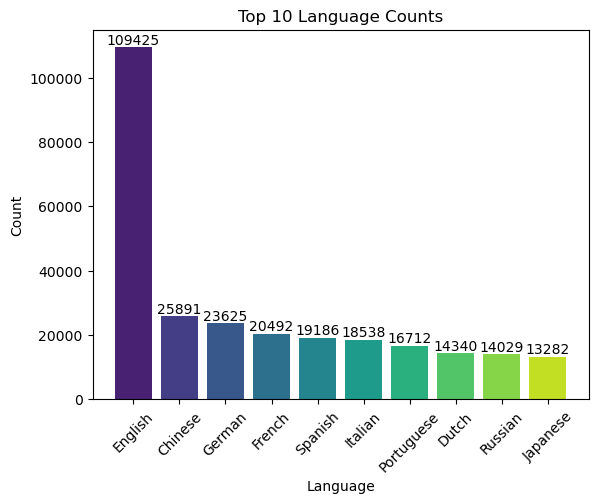

In [43]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Define the subfolder name
# subfolder = '2_apple_apps_plots'
# plot_directory = os.path.join('/Users/keerthidubbala/Desktop/Aug_2023_app_individual_jsons', subfolder)
# os.makedirs(plot_directory, exist_ok=True)

# Count the occurrences of each unique value in the "languages" column
language_counts = apple_df['languages'].explode().value_counts()

# Select the top 10 language counts
top_10_language_counts = language_counts.head(10)

# Define the color palette from the graph below
colors = sns.color_palette("viridis", len(top_10_language_counts))

# Create a bar plot of the top 10 language counts with the specified color palette
plt.bar(top_10_language_counts.index, top_10_language_counts.values, color=colors)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 10 Language Counts')

# Add individual count labels on top of each bar
for i, count in enumerate(top_10_language_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)

# Save the plot in the specified directory
# plot_filename = os.path.join(plot_directory, 'top_10_language_counts.png')
# plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


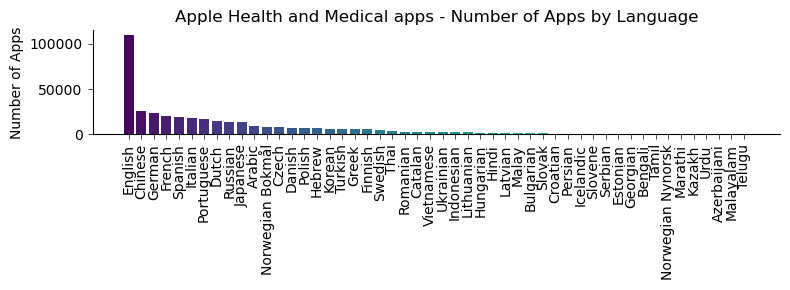

In [44]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Define the subfolder name
subfolder = '2_apple_apps_plots'
# plot_directory = os.path.join('/Users/keerthidubbala/Desktop/Aug_2023_app_individual_jsons', subfolder)
# os.makedirs(plot_directory, exist_ok=True)

# Count the occurrences of each unique value in the "languages" column
language_counts = apple_df['languages'].explode().value_counts()

# Select the top 50 language counts
top_50_language_counts = language_counts.head(50)

# Define the color palette
colors = sns.color_palette("viridis", len(top_50_language_counts))

# Increase the figure width for a more visible and aesthetically pleasing plot
plt.figure(figsize=(8, 3))

# Create a bar plot of the top 50 language counts with the specified color palette
bars = plt.bar(top_50_language_counts.index, top_50_language_counts.values, color=colors)
# plt.xlabel('Language')
plt.ylabel('Number of Apps')
plt.title('Apple Health and Medical apps - Number of Apps by Language')

# Customize style and layout to match the provided example
plt.xticks(rotation=0, ha='center', fontsize=10)  # Keep x-axis labels horizontal and centered
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Remove numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '', ha='center', va='bottom')

# Rotate x-axis labels vertically (90 degrees)
plt.xticks(rotation=90, ha='center', va='top')

# Save the plot in the specified directory
# plot_filename = os.path.join(plot_directory, 'Apple_top_50_language_counts.png')
# plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [118]:
# Figure 1: languages

plt.rcParams["font.family"] = "Times New Roman"
 
indian_languages_sorted = sorted(indian_languages)

# Language grouping 1: priority-wise - Indian, English, Other
apple_df["language_grouping1"] = apple_df["languages"].apply(lambda x: x if isinstance(x, list) else [])
apple_df["language_grouping1"] = apple_df["language_grouping1"].apply(lambda x: "Indian" if any([y in indian_languages for y in x]) else x)
for i in range(len(apple_df)):
    if isinstance(apple_df.loc[i, "language_grouping1"], str):
        continue
    elif "English" in apple_df.loc[i, "language_grouping1"]:
        apple_df.loc[i, "language_grouping1"] = "English"
    else:
        apple_df.loc[i, "language_grouping1"] = "Other"

# Language grouping 2: English, Non-Indian, Hindi, Tamil etc.
apple_df["language_grouping2"] = apple_df["languages"].apply(lambda x: x if isinstance(x, list) else [])
apple_df["language_grouping2"] = apple_df["language_grouping2"].apply(lambda x: x if any([y in indian_languages for y in x]) or "English" in x else ["Other"])
language_counts = apple_df["language_grouping2"].explode().value_counts().to_frame()
allowed_languages = ["English", "Other"] + indian_languages_sorted
allowed_languages = pd.DataFrame(allowed_languages).set_index(0)
language_counts2 = allowed_languages.merge(language_counts, left_index=True, right_index=True, how="left").fillna(0).reset_index().rename(columns={0: "Language", "language_grouping2": "Count"})
language_counts2["Count"] = language_counts2["Count"].apply(int)

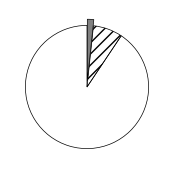

In [152]:
sizes = apple_df["language_grouping1"].explode().value_counts().to_list()

fig, ax = plt.subplots(figsize=(2,2))
wedges, texts = ax.pie(sizes, explode=(0,0,0.1), colors=["None", "None", "gray"], startangle=90, wedgeprops=dict(edgecolor="k", linewidth=0.5))

# Apply hatching patterns
for wedge, hatch in zip(wedges, ['','///','']):
    wedge.set_hatch(hatch)

fig.savefig("languages_apple_pie.pdf", bbox_inches='tight')

In [151]:
100*np.array(sizes)/sum(sizes)

array([90.62460461,  7.69684956,  1.67854582])

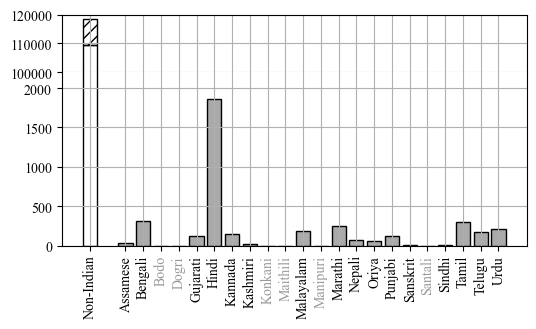

In [11]:
# Version 1

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={
                           'height_ratios': [1, 3],}, sharex=True, figsize=(6, 3))
fig.subplots_adjust(hspace=0.0) 

ax1.bar(language_counts2.index[0], language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax2.bar(language_counts2.index[0], language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax1.bar(language_counts2.index[0], language_counts2.loc[1, "Count"], bottom=language_counts2.loc[0, "Count"], fill=False, hatch='///')
ax2.bar(language_counts2.index[2:], language_counts2.loc[2:,"Count"], color="#aaaaaa", edgecolor="k")

ax1.set_ylim(100000, 120000) 
ax2.set_ylim(0, 2200)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

xticks = list(range(len(language_counts2.index)))
xticks.remove(1)
xticklabels = list(language_counts2["Language"])
xticklabels.remove("Other")
xticklabels[0] = "Non-Indian"

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels, rotation=90)
for i in range(len(ax2.get_xticklabels())):
    if language_counts2.loc[i+1,"Count"]==0:
        ax2.get_xticklabels()[i].set_color("#999999")
ax1.grid()
ax2.grid()
fig.savefig("languages_apple.pdf", bbox_inches='tight')

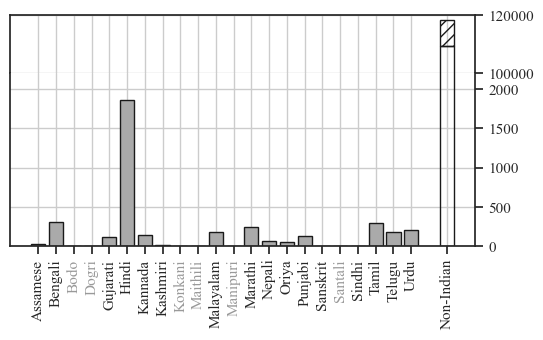

In [120]:
# Version 2

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={
                           'height_ratios': [1, 3],}, sharex=True, figsize=(6, 3))
fig.subplots_adjust(hspace=0.0) 

ax1.bar(language_counts2.index[0]+len(language_counts2.index)-1, language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax2.bar(language_counts2.index[0]+len(language_counts2.index)-1, language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax1.bar(language_counts2.index[0]+len(language_counts2.index)-1, language_counts2.loc[1, "Count"], bottom=language_counts2.loc[0, "Count"], fill=False, edgecolor="k", hatch='///')
ax2.bar(language_counts2.index[2:]-2, language_counts2.loc[2:,"Count"], color="#aaaaaa", edgecolor="k")

ax1.set_ylim(100000, 120000) 
ax2.set_ylim(0, 2200)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.yaxis.tick_right()
ax2.yaxis.tick_right()

xticks = list(range(len(language_counts2.index)))
xticks.remove(len(xticks)-2)
xticklabels = list(language_counts2["Language"])
xticklabels.remove("Other")
xticklabels.remove("English")
xticklabels.append("Non-Indian")

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels, rotation=90)
for i in range(len(ax2.get_xticklabels())-1):
    if language_counts2.loc[i+2,"Count"]==0:
        ax2.get_xticklabels()[i].set_color("#999999")
ax1.grid()
ax2.grid()
fig.savefig("languages_apple.pdf", bbox_inches='tight')

In [36]:
import numpy as np

# Filter rows with Indian languages
indian_apps_df = apple_df[apple_df['languages'].apply(lambda langs: langs is not np.nan and any(lang in indian_languages for lang in langs))]

# Display the filtered DataFrame
print(indian_apps_df)


                                                       id  \
14                                   com.riatech.fitberry   
44                                      com.dtno1.WearPro   
72                        branded.com.spotlightfitness704   
98                             com.tfp.stairsteppermaster   
113                                     com.ethica.inserm   
...                                                   ...   
118308                                co.airapps.calories   
118323  com.medable.puretech-health-lyt-100-2022-204.p...   
118342                            com.cove.ios.reopen.ust   
118370                                 com.ethica.rad3022   
118383                        com.virtupaper.ios.user.c85   

                                 title  \
14        Healthy Recipes- Lose weight   
44                             WearPro   
72                   Spotlight Fitness   
98      Stair Master Climber - Fitness   
113                              iEDEN   
...            

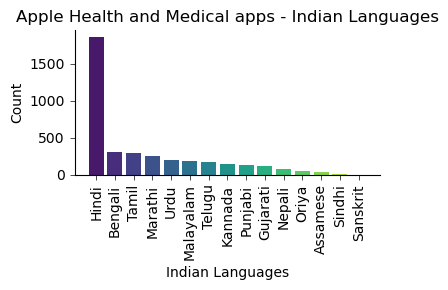

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each Indian language in the filtered DataFrame
indian_language_counts = indian_apps_df['languages'].explode().value_counts()

# Filter out non-Indian languages
indian_language_counts = indian_language_counts[indian_language_counts.index.isin(indian_languages)]

# Sort the language counts in descending order
sorted_language_counts = indian_language_counts.sort_values(ascending=False)

# Define the color palette
colors = sns.color_palette("viridis", len(sorted_language_counts))

# Create a bar plot of Indian language counts with the specified color palette
plt.figure(figsize=(4, 3))
bars = plt.bar(sorted_language_counts.index, sorted_language_counts.values, color=colors)
plt.xlabel('Indian Languages')
plt.ylabel('Count')
plt.title('Apple Health and Medical apps - Indian Languages')

# Customize style and layout
plt.xticks(rotation=90, ha='center', va='top', fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Remove numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '', ha='center', va='bottom')

# Save the plot
plt.tight_layout()
plt.savefig('indian_language_counts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


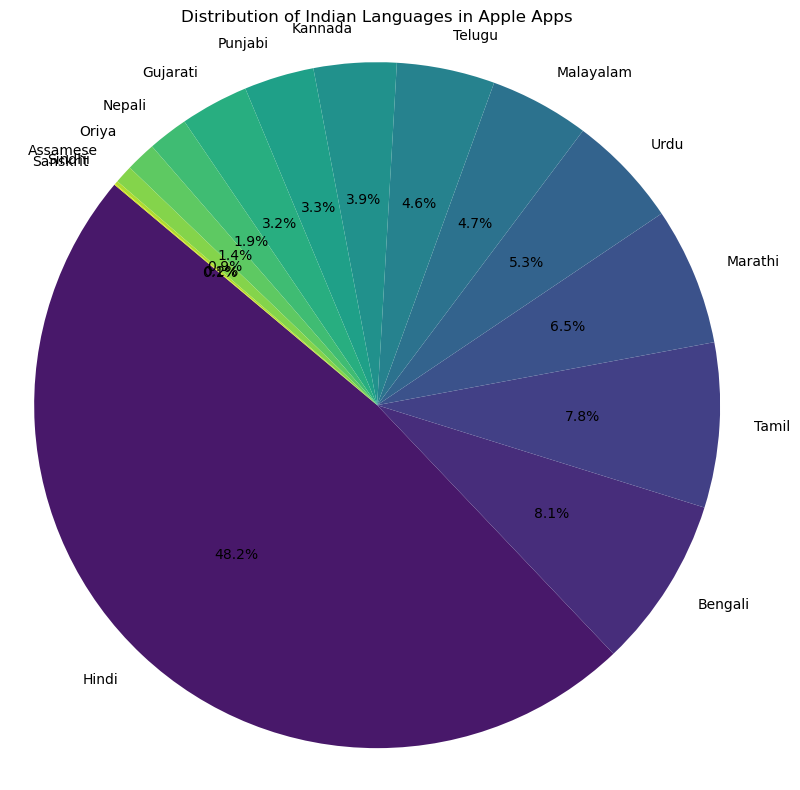

In [387]:
# import matplotlib.pyplot as plt

# Count the occurrences of each Indian language in the filtered DataFrame
indian_language_counts = indian_apps_df['languages'].explode().value_counts()

# Filter out non-Indian languages
indian_language_counts = indian_language_counts[indian_language_counts.index.isin(indian_languages)]

# Create a pie chart of Indian language distribution
plt.figure(figsize=(8, 8))
plt.pie(indian_language_counts, labels=indian_language_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(indian_language_counts)))
plt.title('Distribution of Indian Languages in Apple Apps')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Save the pie chart
plt.tight_layout()
plt.savefig('indian_language_distribution_pie.png', dpi=300, bbox_inches='tight')

# Show the pie chart
plt.show()


In [388]:
# Function to check if all languages in a row are Indian languages
def contains_only_indian_languages(row):
    return all(lang in indian_languages for lang in row)

# Apply the function to each row in the 'languages' column
indian_only_rows = indian_apps_df[indian_apps_df['languages'].apply(contains_only_indian_languages)]

# Display the rows with only Indian languages
print(indian_only_rows)


Empty DataFrame
Columns: [id, title, description, released, updated, required_os, required_os_2021, size, size_2021, score, score_2021, reviews, reviews_2021, price, currency, price_2021, currency_2021, category, genres, languages, developer, url]
Index: []

[0 rows x 22 columns]


In [389]:
from collections import Counter

# Create a Counter for non-Indian languages that appear with Indian languages
non_indian_language_counter = Counter()

# Iterate through the 'languages' column in the filtered DataFrame
for languages in indian_apps_df['languages']:
    non_indian_languages = [lang for lang in languages if lang not in indian_languages]
    non_indian_language_counter.update(non_indian_languages)

# Find the most common non-Indian language
most_common_non_indian_language = non_indian_language_counter.most_common(1)[0]

print("Most common non-Indian language:", most_common_non_indian_language[0])
print("Count:", most_common_non_indian_language[1])


Most common non-Indian language: Chinese
Count: 2665


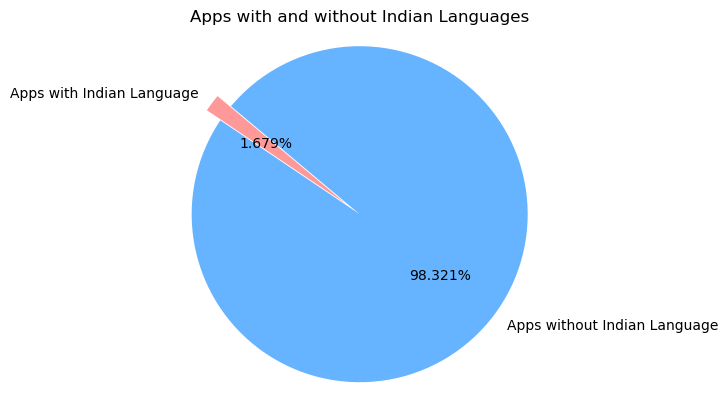

In [390]:
import matplotlib.pyplot as plt

# Calculate the number of apps with at least one Indian language
apps_with_indian_language = len(indian_apps_df)

# Calculate the number of apps without any Indian language
apps_without_indian_language = len(apple_df) - apps_with_indian_language

# Create a pie chart
labels = ['Apps with Indian Language', 'Apps without Indian Language']
sizes = [apps_with_indian_language, apps_without_indian_language]
colors = ['#ff9999', '#66b3ff']  # Custom colors for the slices
explode = (0.1, 0)  # explode 1st slice

# Use a custom autopct format string to show more decimal places
autopct_format = '%.3f%%'

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format, shadow=False, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Apps with and without Indian Languages')
plt.show()


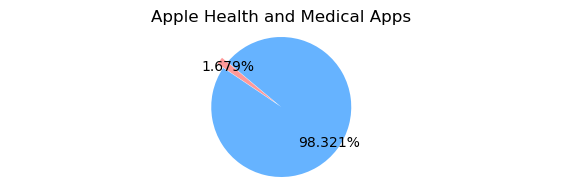

In [404]:
import matplotlib.pyplot as plt

# Calculate the number of apps with at least one Indian language
apps_with_indian_language = len(indian_apps_df)

# Calculate the number of apps without any Indian language
apps_without_indian_language = len(apple_df) - apps_with_indian_language

# Create a pie chart
sizes = [apps_with_indian_language, apps_without_indian_language]
colors = ['#ff9999', '#66b3ff']  # Custom colors for the slices
explode = (0.1, 0)  # explode 1st slice

# Use a custom autopct format string to show more decimal places
autopct_format = '%.3f%%'

plt.figure(figsize=(7, 2))  # Adjust the size of the pie chart
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct=autopct_format, pctdistance=0.85, shadow=False, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with labels and reduce the font size
# labels = ['Apps with Indian Language', 'Apps without Indian Language']
# legend = plt.legend(wedges, labels, loc='lower left', fontsize='small')

# Set the labels in the legend to be outside the pie chart
for text in texts:
    text.set_horizontalalignment('center')

plt.title('Apple Health and Medical Apps')
plt.show()


## * Updated Indian languages list - to do **** 

In [392]:
from collections import Counter

# Create a Counter for non-Indian languages that appear with Indian languages
non_indian_language_counter = Counter()

# Iterate through the 'languages' column in the filtered DataFrame
for languages in indian_apps_df['languages']:
    non_indian_languages = [lang for lang in languages if lang not in indian_languages]
    non_indian_language_counter.update(non_indian_languages)

# Find the most common non-Indian language
most_common_non_indian_language = non_indian_language_counter.most_common(1)[0]

print("Most common non-Indian language:", most_common_non_indian_language[0])
print("Count:", most_common_non_indian_language[1])


Most common non-Indian language: Chinese
Count: 2665


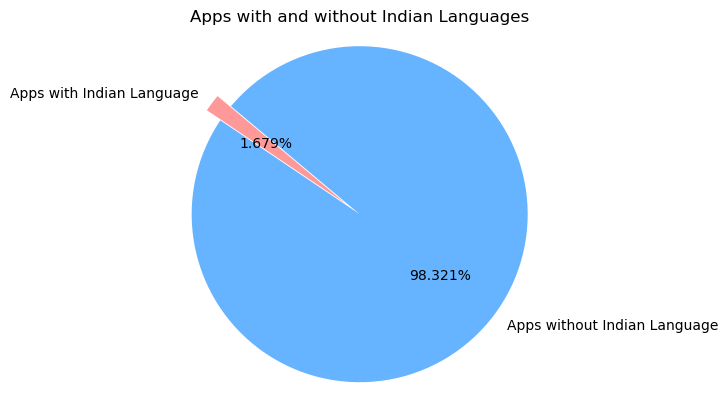

In [393]:
import matplotlib.pyplot as plt

# Calculate the number of apps with at least one Indian language
apps_with_indian_language = len(indian_apps_df)

# Calculate the number of apps without any Indian language
apps_without_indian_language = len(apple_df) - apps_with_indian_language

# Create a pie chart
labels = ['Apps with Indian Language', 'Apps without Indian Language']
sizes = [apps_with_indian_language, apps_without_indian_language]
colors = ['#ff9999', '#66b3ff']  # Custom colors for the slices
explode = (0.1, 0)  # explode 1st slice

# Use a custom autopct format string to show more decimal places
autopct_format = '%.3f%%'

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format, shadow=False, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Apps with and without Indian Languages')
plt.show()


## Selecting English apps

In [18]:
# Filter rows with 'EN' in the 'languages' column
df_en = apple_df[apple_df['languages'].apply(lambda x: isinstance(x, list) and 'English' in x if isinstance(x, list) else False)]

# Print the resulting DataFrame
print(df_en)

                                          id                           title  \
0                              com.s2a.unibo         Wellness Passport UNIBO   
1                   com.gixdev.impact-quotes   Daily Motivational Quotes App   
2       tech.materialize.yogagen.posejournal                 Yogagen Journal   
3                   com.anybuddyapp.anybuddy                        Anybuddy   
4                         com.demontswim.icp       DeMont Family Swim School   
...                                      ...                             ...   
118549      com.americanpatient.patientguide  Patients Hospital Safety Guide   
118550       com.botehealth.armpowersuit8way                   AWI Powersuit   
118551                br.com.suprevida.clube                 Clube Suprevida   
118553                            ibe.lulaj1               Lulaj 1 nonverbal   
118554                com.manage.vmx.aad2023                        AAD 2023   

                                       

### Making Monograms and Bigrams for Title and Description for each of the apps

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import re

# Download NLTK data for tokenization
nltk.download('punkt')

# Define a function to preprocess text and remove stop words
def preprocess_text(text):
    if text is not None:
        # Remove punctuation and unnecessary symbols
        text = re.sub('[' + string.punctuation + ']', '', text)

        # Tokenize the text into individual words, including hyphenated words
        tokens = word_tokenize(text.lower())

        # Read stopwords from a local file and store as a list
        with open("stopwords_git.txt", "r") as file:
            stopwords_list = file.read().splitlines()

        # Additional custom stop words
        extra_stop_words = ['–', '1', 'also', 'always', 'often', 'app', ',', '(', ')', '{', '}', '.', '!', '?', '--', '/b', '\'s', '\'\'', 'n\'t', '"',
                            'based', 'href', 'url', 'http', '\\', '/', '\'re', "''", "``", '•', '●', '·', '⁃', '’', '✔', '◼️', '✰', '❖', '—', '⦁', 'है।', 'के']
        all_stop_words = stopwords_list + extra_stop_words

        tokens = [token for token in tokens if token not in all_stop_words]

        # Remove hyphens at the beginning and in between words
        tokens = [re.sub('-+', '', token) for token in tokens]

        # Return the preprocessed tokens as a list
        return tokens
    else:
        return []

# Apply the preprocessing function to the 'title' column
df_en['title_tokens'] = df_en['title'].apply(preprocess_text)
df_en['description_tokens'] = df_en['description'].apply(preprocess_text)

# Generate bigrams for each row in the 'title_tokens' column
df_en['title_bigrams'] = df_en['title_tokens'].apply(lambda x: list(ngrams(x, 2, pad_left=True, pad_right=True)))

# Generate bigrams for each row in the 'description_tokens' column
df_en['description_bigrams'] = df_en['description_tokens'].apply(lambda x: list(ngrams(x, 2, pad_left=True, pad_right=True)))

# Generate monograms (single words) for each row in the 'title_tokens' column
df_en['title_monograms'] = df_en['title_tokens'].apply(lambda x: [token for token in x if '-' not in token])

# Generate monograms (single words) for each row in the 'description_tokens' column
df_en['description_monograms'] = df_en['description_tokens'].apply(lambda x: [token for token in x if '-' not in token])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keerthidubbala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_23043/617445572.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['title_tokens'] = df_en['title'].apply(preprocess_text)
/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_23043/617445572.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['description_tokens'] = df_en['description'].

In [20]:
df_en['description_monograms']
# df_en
# df_en['description']

0         [wellness, passport, è, sistema, monitoraggio,...
1         [hey, kirill, developer, impact, quotes, quote...
2         [track, yoga, journey, pose, pose, log, photo,...
3         [anybuddy, frees, sports, book, tennis, padel,...
4         [learn, comfortable, water, land, awardwinning...
                                ...                        
118549    [hospitals, dangerous, preventable, medical, e...
118550    [simple, clean, interface, design, easy, users...
118551    [clube, suprevida, bem, faz, bem, é, clube, co...
118553    [lulaj, nonverbal, „, “, …, support, everyday,...
118554    [die, augenärztliche, akademie, ist, die, führ...
Name: description_monograms, Length: 109425, dtype: object

In [35]:
df_en

id                           title  \
0                              com.s2a.unibo         Wellness Passport UNIBO   
1                   com.gixdev.impact-quotes   Daily Motivational Quotes App   
2       tech.materialize.yogagen.posejournal                 Yogagen Journal   
3                   com.anybuddyapp.anybuddy                        Anybuddy   
4                         com.demontswim.icp       DeMont Family Swim School   
...                                      ...                             ...   
118549      com.americanpatient.patientguide  Patients Hospital Safety Guide   
118550       com.botehealth.armpowersuit8way                   AWI Powersuit   
118551                br.com.suprevida.clube                 Clube Suprevida   
118553                            ibe.lulaj1               Lulaj 1 nonverbal   
118554                com.manage.vmx.aad2023                        AAD 2023   

                                              description  \
0       Il Wellness Passport è un sistema per il monit...   
1       Hey! I'm Kirill, developer of Impact Quotes.\n...   
2       Keep track of your yoga journey pose by pose. ...   
3       Anybuddy frees up sports.\n\nYou can now book ...   
4       Learn to be as comfortable in water as you are...   
...                                                   ...   
118549  Hospitals are dangerous places. Preventable me...   
118550  Simple and clean interface design, easy for us...   
118551  O Clube Suprevida – Bem Faz Bem é um clube col...   
118553  Lulaj 1 nonverbal – an app „you have to have“ ...   
118554  Die Augenärztliche Akademie ist die führende T...   

                    released               updated required_os  \
0       2020-11-16T08:00:00Z  2022-05-03T13:22:28Z        12.0   
1       2022-07-03T07:00:00Z  2023-07-03T22:28:57Z        14.0   
2       2021-12-13T08:00:00Z  2021-12-13T21:12:22Z        14.5   
3       2021-04-28T07:00:00Z  2023-06-09T10:32:43Z        14.0   
4       2022-11-10T08:00:00Z  2023-05-17T06:31:28Z        11.0   
...                      ...                   ...         ...   
118549  2020-09-14T07:00:00Z  2020-12-04T20:04:14Z        10.0   
118550  2020-05-26T07:00:00Z  2020-05-26T19:55:14Z        12.2   
118551  2020-01-07T08:00:00Z  2021-01-28T22:23:57Z        10.0   
118553  2016-06-30T22:57:00Z  2021-10-12T18:07:52Z        10.0   
118554  2022-12-15T08:00:00Z  2023-01-16T09:28:15Z        13.0   

       required_os_2021      size   size_2021  score  ...   developer  \
0                  12.0  18852864  16457728.0    0.0  ...   731917399   
1                   NaN  25513984         NaN    0.0  ...   480930859   
2                   NaN  10301440         NaN    0.0  ...  1549895281   
3                   NaN  65343488         NaN    0.0  ...  1159088111   
4                   NaN  61378560         NaN    0.0  ...  1653140546   
...                 ...       ...         ...    ...  ...         ...   
118549             10.0  52804608  52804608.0    0.0  ...  1531576106   
118550              NaN  19177472         NaN    0.0  ...  1482249834   
118551             10.0  89737216  89737216.0    0.0  ...  1492164324   
118553             10.0  20736000  20736000.0    0.0  ...  1000671756   
118554              NaN  29924352         NaN    0.0  ...   526168096   

                                                      url  \
0       https://apps.apple.com/in/app/wellness-passpor...   
1       https://apps.apple.com/in/app/daily-motivation...   
2       https://apps.apple.com/in/app/yogagen-journal/...   
3       https://apps.apple.com/in/app/anybuddy/id11590...   
4       https://apps.apple.com/in/app/demont-family-sw...   
...                                                   ...   
118549  https://apps.apple.com/in/app/patients-hospita...   
118550  https://apps.apple.com/in/app/awi-powersuit/id...   
118551  https://apps.apple.com/in/app/clube-suprevida/...   
118553  https://apps.apple.com/in/app/lulaj-1-nonverba...   
118554 

In [36]:
df_en['description_language']

0         it
1         en
2         en
3         en
4         en
          ..
118549    en
118550    en
118551    pt
118553    en
118554    de
Name: description_language, Length: 109425, dtype: object

## Making dataframe with apps that have title and description in english. 

In [34]:
# I realised that some of my rows are not in English, even though they languages column says its in English. 
# I want to check the which language a row is in, using nltk. How do I do that? 
# I want to use the columns = Title and description for this

from langdetect import detect

# df = df_en
# Define a function to detect the language of a text
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'Unknown'
    return lang

# Apply the language detection function to the 'title' and 'description' columns
df_en['title_language'] = df_en['title'].apply(detect_language)
df_en['description_language'] = df_en['description'].apply(detect_language)

# Print the updated DataFrame
print(df_en)


# <!-- I want to see how many of the rows in the column - 'description_language' are in english -->

english_count = df_en['description_language'].str.lower().str.contains('en').sum()
print("Number of rows in English:", english_count)

## ==================================Results======================
# Number of rows in English: 67425
# I want to make another dataframe with all these rows that are detected to be in english
# and I want to see a sample of the apps that are not detected as english

english_df = df_en[df_en['description_language'].str.lower().str.contains('en')] # check how it is called' en or english or English etc

non_english_df = df_en[~df_en['description_language'].str.lower().str.contains('en')]
sample_non_english = non_english_df.sample(n=5)
print(sample_non_english[['title', 'description', 'description_language']])

## ==================================Results======================
# okay, it seemed to have worked. I saw the sample of non-english apps. 
# I have 67425 (now I have 67444 apps, when I did it the second time, interesting.) apps that are in english
# But its okay, take care of this later #later

/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_23043/3941291595.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['title_language'] = df_en['title'].apply(detect_language)
/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_23043/3941291595.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['description_language'] = df_en['description'].apply(detect_language)


                                          id                           title  \
0                              com.s2a.unibo         Wellness Passport UNIBO   
1                   com.gixdev.impact-quotes   Daily Motivational Quotes App   
2       tech.materialize.yogagen.posejournal                 Yogagen Journal   
3                   com.anybuddyapp.anybuddy                        Anybuddy   
4                         com.demontswim.icp       DeMont Family Swim School   
...                                      ...                             ...   
118549      com.americanpatient.patientguide  Patients Hospital Safety Guide   
118550       com.botehealth.armpowersuit8way                   AWI Powersuit   
118551                br.com.suprevida.clube                 Clube Suprevida   
118553                            ibe.lulaj1               Lulaj 1 nonverbal   
118554                com.manage.vmx.aad2023                        AAD 2023   

                                       

In [39]:
english_df

# # Save the DataFrame to a CSV file
english_df.to_csv('english_apple_apps.csv', index=False)
# There are 67448 english apps, that claim tobe in english and actually happen to be in english

In [40]:
english_df

id                           title  \
1                   com.gixdev.impact-quotes   Daily Motivational Quotes App   
2       tech.materialize.yogagen.posejournal                 Yogagen Journal   
3                   com.anybuddyapp.anybuddy                        Anybuddy   
4                         com.demontswim.icp       DeMont Family Swim School   
6                        com.dotvisionmotion                DotVision Motion   
...                                      ...                             ...   
118547           kz.maestrosultan.FitJournal    Fit Journal: Gym Workout Log   
118548            com.bestapp-studio.minus60                    Minus 60 Pro   
118549      com.americanpatient.patientguide  Patients Hospital Safety Guide   
118550       com.botehealth.armpowersuit8way                   AWI Powersuit   
118553                            ibe.lulaj1               Lulaj 1 nonverbal   

                                              description  \
1       Hey! I'm Kirill, developer of Impact Quotes.\n...   
2       Keep track of your yoga journey pose by pose. ...   
3       Anybuddy frees up sports.\n\nYou can now book ...   
4       Learn to be as comfortable in water as you are...   
6       DotVision Motion is a real-time geolocation pl...   
...                                                   ...   
118547  Are you tired of not seeing the results you wa...   
118548  *** App #1 in the App Store for the fans of "M...   
118549  Hospitals are dangerous places. Preventable me...   
118550  Simple and clean interface design, easy for us...   
118553  Lulaj 1 nonverbal – an app „you have to have“ ...   

                    released               updated required_os  \
1       2022-07-03T07:00:00Z  2023-07-03T22:28:57Z        14.0   
2       2021-12-13T08:00:00Z  2021-12-13T21:12:22Z        14.5   
3       2021-04-28T07:00:00Z  2023-06-09T10:32:43Z        14.0   
4       2022-11-10T08:00:00Z  2023-05-17T06:31:28Z        11.0   
6       2018-06-30T06:58:04Z  2021-10-26T13:45:40Z        11.0   
...                      ...                   ...         ...   
118547  2021-05-18T07:00:00Z  2023-05-30T14:49:30Z        14.0   
118548  2014-12-05T20:43:31Z  2014-12-05T20:43:31Z         6.0   
118549  2020-09-14T07:00:00Z  2020-12-04T20:04:14Z        10.0   
118550  2020-05-26T07:00:00Z  2020-05-26T19:55:14Z        12.2   
118553  2016-06-30T22:57:00Z  2021-10-12T18:07:52Z        10.0   

       required_os_2021      size   size_2021    score  ...   developer  \
1                   NaN  25513984         NaN  0.00000  ...   480930859   
2                   NaN  10301440         NaN  0.00000  ...  1549895281   
3                   NaN  65343488         NaN  0.00000  ...  1159088111   
4                   NaN  61378560         NaN  0.00000  ...  1653140546   
6                   NaN  46581760         NaN  0.00000  ...  1282312575   
...                 ...       ...         ...      ...  ...         ...   
118547             13.0  46384128  32435200.0  4.59999  ...  1239282457   
118548              NaN  58318848         NaN  0.00000  ...   739061892   
118549             10.0  52804608  52804608.0  0.00000  ...  1531576106   
118550              NaN  19177472         NaN  0.00000  ...  1482249834   
118553             10.0  20736000  20736000.0  0.00000  ...  1000671756   

                                                      url  \
1       https://apps.apple.com/in/app/daily-motivation...   
2       https://apps.apple.com/in/app/yogagen-journal/...   
3       https://apps.apple.com/in/app/anybuddy/id11590...   
4       https://apps.apple.com/in/app/demont-family-sw...   
6       https://apps.apple.com/in/app/dotvision-motion...   
...                                                   ...   
118547  https://apps.apple.com/in/app/fit-journal-gym-...   
118548  https://apps.apple.com/in/app/minus-60-pro/id9...   
118549  https://apps.apple.com/in/app/patients-hospita...   
118550  https://apps.apple.com/in/app/awi-po

In [41]:
import pandas as pd

# Assuming you have a CSV file called 'filename.csv' in the current directory

# Read the CSV file into a DataFrame
english_df = pd.read_csv('english_apple_apps.csv')


## Taking out vet words - Use english_df from now on

In [42]:
# Creating a list of words for Ischemic Heart Disease and associated conditions
disease_1_list = ['vet', 'veterinary', 'animal', 'dog', 'cat', 'pet']
#Tokenising and stemising these words
import nltk
from nltk.stem import SnowballStemmer

# Define the stemmer;llk
stemmer = SnowballStemmer('english')

# Tokenize and stem each word in the disease list and store in a new list
disease_list_stemmed = []
for phrase in disease_1_list:
    tokens = nltk.word_tokenize(phrase)
    stems = [stemmer.stem(token) for token in tokens]
    disease_list_stemmed += stems

# Remove duplicates from the list and words 'stable', 'unstable', and 'disease'
# disease_list_clean = list(set([word for word in disease_list_stemmed if word not in ['care', 'health', 'well', 'track', 'nutrit', 'behavior',
                                                                                      # 'train' ]]))
disease_list_clean = disease_list_stemmed
# Print the cleaned disease list
print('Tokenised and Summarised disease terms list is - ', disease_list_clean)

# Tokenised and Summarised disease terms list is -  
# ['vet', 'veterinari', 'anim', 'dog', 'cat', 'pet', 'anim', 'pet', 'groom', 'adopt', 
# 'rescu', 'communic', 'pet', 'insur', 'shelter', 'pet', 'first', 'aid', 'anim',
#  'therapi', 'pet-friend', 'anim', 'lover', 'pet', 'suppli', 'anim', 'hospit', 'asana', 'pranayama', 'yoga', 
# 'pose', 'yoga', 'workout', 'yoga', 'exercis', 'yoga', 'routin', 'yoga', 'class', 'yoga', 'train', 'yoga', 'practic', 
# 'yoga', 'session', 'mind', 'relax', 'contempl', 'deep', 'breath', 'mental', 'calm', 'inner', 'peac', 'self-reflect',
#  'stress', 'relief', 'guid', 'medit', 'medit', 'exercis']
#----------------------------------------------------------

# Counting Disease terms in tokenised and stemmized - Title, Summary and description

# Check the data type of each column
print(english_df['title_monograms'].apply(type))
# print(english_df['stemmized_summary'].apply(type))
print(english_df['description_monograms'].apply(type))

# Define a function to calculate the frequency of disease terms in a list of words
def count_disease_terms(text, disease_list_clean):
    # Count the frequency of each disease term in the list of words
    freq = {term: 0 for term in disease_list_clean}
    for term in disease_list_clean:
        freq[term] = text.count(term)
    # Return the frequency counts as a list
    return list(freq.values())

# Calculate the frequency of disease terms in each row of the data frame. This is specific for each of the diseases
# Instead of creating new columns for each, we will just reuse each. 
english_df['vet_freq_title'] = english_df['title_monograms'].apply(lambda x: count_disease_terms(x, disease_list_clean) if isinstance(x, list) else [0] * len(disease_list_clean))
# english_df['disease_freq_summary'] = english_df['stemmized_summary'].apply(lambda x: count_disease_terms(x, disease_list_clean) if isinstance(x, list) else [0] * len(disease_list_clean))
english_df['vet_freq_description'] = english_df['description_monograms'].apply(lambda x: count_disease_terms(x, disease_list_clean) if isinstance(x, list) else [0] * len(disease_list_clean))

# Print the data frame with the new columns
print(english_df)


# Filter the dataframe to exclude apps with vet-related words in the title
english_df2 = english_df[~(english_df['title'].str.contains('|'.join(disease_list_clean), case=False) |
                           english_df['description'].str.contains('|'.join(disease_list_clean), case=False))]

# Print the updated dataframe
print(english_df2)

# There were 67448 apps originally
# There are 64939 apps that do not have the words - yoga, meditation and veterinary words

Tokenised and Summarised disease terms list is -  ['vet', 'veterinari', 'anim', 'dog', 'cat', 'pet']
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
79961    <class 'str'>
79962    <class 'str'>
79963    <class 'str'>
79964    <class 'str'>
79965    <class 'str'>
Name: title_monograms, Length: 79966, dtype: object
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
79961    <class 'str'>
79962    <class 'str'>
79963    <class 'str'>
79964    <class 'str'>
79965    <class 'str'>
Name: description_monograms, Length: 79966, dtype: object
                                         id                           title  \
0                  com.gixdev.impact-quotes   Daily Motivational Quotes App   
1      tech.materialize.yogagen.posejournal                 Yogagen Journal   
2                  com.anybuddyapp.anybuddy   

In [43]:
# english_df2.to_csv('english_novet_apple_apps.csv', index=False) #one without a number is the current version. Where as numbers are given for older versions

# # 10 July version is 1_english_novet_apple_apps.csv  #change here

In [44]:
english_df2['description_bigrams']

0        [(None, 'hey'), ('hey', 'kirill'), ('kirill', ...
1        [(None, 'track'), ('track', 'yoga'), ('yoga', ...
5        [(None, 'quickem'), ('quickem', 'rapid'), ('ra...
8        [(None, 'mymetlife'), ('mymetlife', 'customerc...
9        [(None, 'semg'), ('semg', 'biofeedback'), ('bi...
                               ...                        
79955    [(None, 'haptic'), ('haptic', 'constant'), ('c...
79956    [(None, 'snaptype'), ('snaptype', 'helps'), ('...
79957    [(None, 'serenity'), ('serenity', 'beautifully...
79961    [(None, 'tired'), ('tired', 'fitness'), ('fitn...
79964    [(None, 'simple'), ('simple', 'clean'), ('clea...
Name: description_bigrams, Length: 39408, dtype: object

In [45]:
csv_file_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/english_novet_apple_apps.csv"
english_df2.to_csv(csv_file_path, index=False)

In [46]:
english_df2['title_bigrams']

0        [(None, 'daily'), ('daily', 'motivational'), (...
1        [(None, 'yogagen'), ('yogagen', 'journal'), ('...
5                   [(None, 'quickem'), ('quickem', None)]
8               [(None, 'mymetlife'), ('mymetlife', None)]
9                       [(None, 'xyebt'), ('xyebt', None)]
                               ...                        
79955    [(None, 'wrist'), ('wrist', 'pace'), ('pace', ...
79956             [(None, 'snaptype'), ('snaptype', None)]
79957    [(None, 'serenity'), ('serenity', 'meditation'...
79961    [(None, 'fit'), ('fit', 'journal'), ('journal'...
79964    [(None, 'awi'), ('awi', 'powersuit'), ('powers...
Name: title_bigrams, Length: 39408, dtype: object

## ------------------------Break Point -----------------------

### Continuing from english_novet_apps

In [5]:
import pandas as pd

# Assuming you have a CSV file called 'filename.csv' in the current directory

# Read the CSV file into a DataFrame
english_df = pd.read_csv('english_novet_apple_apps.csv')

# ---------------------------Do this everytime the csv file is loaded-----------
# # # Evaluating strings that are actually lists into lists
import ast

english_df['description_monograms'] = english_df['description_monograms'].apply(ast.literal_eval)
english_df['title_monograms'] = english_df['title_monograms'].apply(ast.literal_eval)
english_df['description_bigrams'] = english_df['description_bigrams'].apply(ast.literal_eval)
english_df['title_bigrams'] = english_df['title_bigrams'].apply(ast.literal_eval)
# # -----------------------------Do it only once---------------------

'id', 'title', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 
                             'reviews', 'reviews_2021', 'currency_2021', 
                             'category', 'genres', 'languages', 'price', 'price_2021', 'currency'

In [6]:
# Read the CSV file into a DataFrame
# english_df = pd.read_csv('english_novet_df.csv')

english_df['title_monograms']

0            [daily, motivational, quotes]
1                       [yogagen, journal]
2                                [quickem]
3                              [mymetlife]
4                                  [xyebt]
                       ...                
39403                 [wrist, pace, maker]
39404                           [snaptype]
39405        [serenity, meditation, timer]
39406    [fit, journal, gym, workout, log]
39407                     [awi, powersuit]
Name: title_monograms, Length: 39408, dtype: object

### Disease words Monograms and Bigrams

In [7]:
# I have all English apps, I have all monograms and bigrams from title and description. I can now do the IHD thingy

#------------------Monograms from Disease words--------------------------

# Creating a list of words for Ischemic Heart Disease and associated conditions
disease_1_list = ['Heart disease', 'Cardiovascular disease', 'Coronary artery disease', 'Myocardial infarction', 'Ischemic heart disease', 
                  'Angina', 'Atherosclerosis', 'Hypertensive heart disease', 'Valvular heart disease', 'Congenital heart disease', 'Rheumatic heart disease', 
                  'Heart failure', 'Cardiomyopathy', 'Arrhythmia', 'Palpitations', 'Chest pain', 'Shortness of breath', 'Fatigue', 'Edema', 'High blood pressure', 
                  'Hypertension', 'Coronary artery bypass graft', 'Percutaneous coronary intervention', 'Stent', 'Echocardiogram', 'Electrocardiogram', 
                  'Cardiac catheterization', 'Cardiac MRI', 'Cardiac rehabilitation', 'Beta-blockers', 'Calcium channel blockers', 'ACE inhibitors', 'Diuretics', 
                  'Statins', 'Antiplatelet medications', 'Anticoagulants', 'Angiotensin receptor blockers', 'Pacemaker', 'Defibrillator', 'Heart transplant', 
                  'Atrial fibrillation', 'Ventricular fibrillation', 'Supraventricular tachycardia', 'Bradycardia', 'Heart murmur', 'Pericarditis', 'Endocarditis', 
                  'Myocarditis', 'Kawasaki disease', 'Systemic lupus erythematosus', 'Rheumatoid arthritis', 'Giant cell myocarditis', 'Viral myocarditis', 
                  'Dilated cardiomyopathy', 'Hypertrophic cardiomyopathy', 'Restrictive cardiomyopathy', 'Blocked arteries', 'Clogged arteries', 'Heart blockage', 
                  'Heart attack', 'Cardiac arrest', 'Heart condition', 'Heart problems', 'Heart trouble', 'Heart disorder', 'Heart issues', 'Chest discomfort', 
                  'Chest tightness', 'Heartache', 'Breathlessness', 'Labored breathing', 'Heavy breathing', 'Racing heart', 'Rapid heartbeat', 'Irregular heartbeat', 
                  'Skipped beats', 'Swelling', 'Fluid retention', 'Silent killer', 'Bypass surgery', 'Heart surgery', 'Open-heart surgery', 'Coronary bypass', 
                  'Bypass operation', 'Stent surgery', 'Stent placement', 'Balloon procedure', 'Valve surgery', 'Heart valve repair', 'Valve replacement', 'Cardiac rehab', 
                  'Blood thinners', 'Clot-busting drugs', 'Clot-preventing medication', 'Blood pressure meds', 'Cholesterol-lowering drugs', 'Statins', 'Heart rehab', 
                  'Cardiac rehab', 'Heart transplant', 'New heart', 'Artificial heart', 'Pacemaker', 'Defibrillator', 'Shock device', 'Electrical device', 
                  'Beating again', 'Life-saving surgery', 'cardiology', 'cardiologist', 'cardiothoracic']

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Define the stemmer
stemmer = SnowballStemmer('english')

# Create an empty list to store the stemmed words
disease_list_stemmed = []

# Tokenize, stem, and add unique words to the stemmed list
for phrase in disease_1_list:
    tokens = word_tokenize(phrase.lower())  # Convert to lowercase before tokenization
    stems = [stemmer.stem(token) for token in tokens]
    disease_list_stemmed.extend(stems)

# Get unique stemmed words by converting the list to a set and then back to a list
disease_list_stemmed_unique = list(set(disease_list_stemmed))

print(disease_list_stemmed_unique)

#===========================Results===============================

#'angiotensin', 'receptor', 'rheumatoid', 'ace', 'dilat', 'infarct', 'mri', 'erythematosus', 'chest', 'bradycardia', 'heart', 'blood', 'medic', 
# 'murmur', 'short', 'blocker', 'cardiac', 'inhibitor', 'angina', 'beta-block', 'endocard', 'palpit', 'tachycardia', 'fibril', 'rheumat', 'hypertens',
#  'pressur', 'intervent', 'ischem', 'failur', 'diseas', 'percutan', 'cell', 'myocard', 'ventricular', 'bypass', 'pericard', 'arrhythmia', 'channel', 'echocardiogram',
#  'coronari', 'rehabilit', 'congenit', 'antiplatelet', 'diuret', 'electrocardiogram', 'statin', 'system', 'graft', 'atherosclerosi', 'fatigu', 'calcium', 'stent',
#  'of', 'catheter', 'supraventricular', 'pain', 'giant', 'pacemak', 'valvular', 'myocardi', 'cardiomyopathi', 'arteri', 'restrict', 'edema', 'high', 'anticoagul', 
# 'transplant', 'defibril', 'kawasaki', 'arthriti', 'hypertroph', 'atrial', 'viral', 'breath', 'lupus', 'cardiovascular'

# However, This did not include - ECG, EKG, so we will add them separately and delete the word 'of'

disease_list_stemmed_unique = [word for word in disease_list_stemmed_unique if word != 'of']
disease_list_stemmed_unique.extend(['ekg', 'ecg'])

print(disease_list_stemmed_unique)
# Now it is fixed

stemmed_monogram_list = disease_list_stemmed_unique

#------------------Bigrams from Disease words--------------------------

# Generate bigrams from the list of words

from nltk import bigrams, word_tokenize, PorterStemmer

# List of words
word_list = ['Heart disease', 'Cardiovascular disease', 'Coronary artery disease', 'Myocardial infarction', 'Ischemic heart disease', 
                  'Angina', 'Atherosclerosis', 'Hypertensive heart disease', 'Valvular heart disease', 'Congenital heart disease', 'Rheumatic heart disease', 
                  'Heart failure', 'Cardiomyopathy', 'Arrhythmia', 'Palpitations', 'Chest pain', 'Shortness of breath', 'Fatigue', 'Edema', 'High blood pressure', 
                  'Hypertension', 'Coronary artery bypass graft', 'Percutaneous coronary intervention', 'Stent', 'Echocardiogram', 'Electrocardiogram', 
                  'Cardiac catheterization', 'Cardiac MRI', 'Cardiac rehabilitation', 'Beta-blockers', 'Calcium channel blockers', 'ACE inhibitors', 'Diuretics', 
                  'Statins', 'Antiplatelet medications', 'Anticoagulants', 'Angiotensin receptor blockers', 'Pacemaker', 'Defibrillator', 'Heart transplant', 
                  'Atrial fibrillation', 'Ventricular fibrillation', 'Supraventricular tachycardia', 'Bradycardia', 'Heart murmur', 'Pericarditis', 'Endocarditis', 
                  'Myocarditis', 'Kawasaki disease', 'Systemic lupus erythematosus', 'Rheumatoid arthritis', 'Giant cell myocarditis', 'Viral myocarditis', 
                  'Dilated cardiomyopathy', 'Hypertrophic cardiomyopathy', 'Restrictive cardiomyopathy', 'Blocked arteries', 'Clogged arteries', 'Heart blockage', 
                  'Heart attack', 'Cardiac arrest', 'Heart condition', 'Heart problems', 'Heart trouble', 'Heart disorder', 'Heart issues', 'Chest discomfort', 
                  'Chest tightness', 'Heartache', 'Breathlessness', 'Labored breathing', 'Heavy breathing', 'Racing heart', 'Rapid heartbeat', 'Irregular heartbeat', 
                  'Skipped beats', 'Swelling', 'Fluid retention', 'Silent killer', 'Bypass surgery', 'Heart surgery', 'Open-heart surgery', 'Coronary bypass', 
                  'Bypass operation', 'Stent surgery', 'Stent placement', 'Balloon procedure', 'Valve surgery', 'Heart valve repair', 'Valve replacement', 'Cardiac rehab', 
                  'Blood thinners', 'Clot-busting drugs', 'Clot-preventing medication', 'Blood pressure meds', 'Cholesterol-lowering drugs', 'Statins', 'Heart rehab', 
                  'Cardiac rehab', 'Heart transplant', 'New heart', 'Artificial heart', 'Pacemaker', 'Defibrillator', 'Shock device', 'Electrical device', 
                  'Beating again', 'Life-saving surgery', 'cardiology', 'cardiologist', 'cardiothoracic']

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Create bigrams and perform stemming
stemmed_bigram_list = []
for phrase in word_list:
    words = word_tokenize(phrase)
    stemmed_words = [stemmer.stem(word) for word in words if word not in ['of', "'s", '(', ')', 'b', 'c' ]]
    bigrams_list = list(bigrams(stemmed_words))
    stemmed_bigram_list.extend(bigrams_list)

# Print the stemmed bigrams
for bigram in stemmed_bigram_list:
    print(bigram)



['thinner', 'cardiologist', 'angiotensin', 'clot-prev', 'stent', 'cardiomyopathi', 'procedur', 'mri', 'chest', 'replac', 'devic', 'short', 'viral', 'bypass', 'arteri', 'breath', 'killer', 'problem', 'hypertroph', 'coronari', 'restrict', 'new', 'transplant', 'channel', 'attack', 'arrhythmia', 'clog', 'labor', 'cardiothorac', 'fatigu', 'pressur', 'congenit', 'palpit', 'open-heart', 'failur', 'blockag', 'antiplatelet', 'beta-block', 'bradycardia', 'arthriti', 'oper', 'cell', 'fluid', 'surgeri', 'angina', 'condit', 'rehab', 'calcium', 'electrocardiogram', 'percutan', 'anticoagul', 'kawasaki', 'pain', 'again', 'ventricular', 'rheumat', 'receptor', 'drug', 'murmur', 'tachycardia', 'echocardiogram', 'pacemak', 'of', 'diseas', 'statin', 'rapid', 'myocardi', 'discomfort', 'electr', 'graft', 'infarct', 'blocker', 'beat', 'heartbeat', 'swell', 'rheumatoid', 'intervent', 'block', 'medic', 'pericard', 'balloon', 'endocard', 'artifici', 'diuret', 'fibril', 'ischem', 'silent', 'dilat', 'life-sav', 'r

In [9]:
# import pandas as pd

# df = english_df

def process_disease_monograms(row):
    # Initialize empty lists for the disease terms in the description
    description_terms = []
    # summary_terms = []
    title_terms = []
    
    # Loop through the disease terms and append them to the list if they are present in the row
    for term in set(stemmed_monogram_list):
        if term in row['description_monograms']:
            description_terms.append(term)
        # if term in row['summary_monograms']:
            # summary_terms.append(term)
        if term in row['title_monograms']:
            title_terms.append(term)
    # Create a new column by combining the terms from different columns
    combined_terms = description_terms + title_terms
    
    return pd.Series({
        'disease_terms_description_monograms': description_terms,
        # 'disease_terms_summary_monograms': summary_terms,
        'disease_terms_title_monograms': title_terms,
        'disease_terms_description_monograms_count': len(description_terms),
        # 'disease_terms_summary_monograms_count': len(summary_terms),
        'disease_terms_title_monograms_count': len(title_terms),
        'total_count_monograms_app': len(description_terms) + len(title_terms),
        'combined_monogram_terms': combined_terms
    })

# Apply the function to create new columns with lists of disease terms in each row
english_df[['disease_terms_description_monograms', 'disease_terms_title_monograms',
    'disease_terms_description_monograms_count',
    'disease_terms_title_monograms_count', 'total_count_monograms_app', 'combined_monogram_terms']] = english_df.apply(process_disease_monograms, axis=1)

# Print the resulting data frame
print(english_df)

# Calculate the minimum and maximum values for the count columns
min_counts = english_df[['disease_terms_description_monograms_count',
                 'disease_terms_title_monograms_count', 'total_count_monograms_app']].min()
max_counts = english_df[['disease_terms_description_monograms_count',
                 'disease_terms_title_monograms_count', 'total_count_monograms_app']].max()

# Print the minimum and maximum values
print("Minimum counts:")
print(min_counts)
print("\nMaximum counts:")
print(max_counts)

# ------------------------------------------- Counting Bigrams 

### Making new columns for disease bigrams found in Title, summary and Description


## df is still english_df, so not changing anything

# import pandas as pd
# import numpy as np

# Define a function to create lists of disease terms in each row and count the number of bigrams
def process_disease_bigrams(row):
    # stemmed_bigram_list = ['bigram1', 'bigram2', 'bigram3']  # Make sure there is a stemmed list of bigrams already
    
    # Initialize empty lists for the disease terms in the description
    description_terms = []
    summary_terms = []
    title_terms = []
    
    # Loop through the disease terms and append them to the list if they are present in the row
    for term in set(stemmed_bigram_list):
        if term in row['description_bigrams']:
            description_terms.append(term)
        # if term in row['summary_bigrams']:
            # summary_terms.append(term)
        if term in row['title_bigrams']:
            title_terms.append(term)
    
   # Create a new column by combining the terms from different columns
    combined_terms = description_terms + summary_terms + title_terms
    
    return pd.Series({
        'disease_terms_description_bigrams': description_terms,
        # 'disease_terms_summary_bigrams': summary_terms,
        'disease_terms_title_bigrams': title_terms,
        'disease_terms_description_bigrams_count': len(description_terms),
        # 'disease_terms_summary_bigrams_count': len(summary_terms),
        'disease_terms_title_bigrams_count': len(title_terms),
        'total_count_bigrams_app': len(description_terms) + len(title_terms),
        'combined_bigram_terms': combined_terms
    })

# Apply the function to create new columns with lists of disease terms in each row
english_df[['disease_terms_description_bigrams', 'disease_terms_title_bigrams',
    'disease_terms_description_bigrams_count',
    'disease_terms_title_bigrams_count', 'total_count_bigrams_app', 'combined_bigram_terms']] = english_df.apply(process_disease_bigrams, axis=1)

# Print the resulting data frame
print(english_df)
# Calculate the minimum and maximum values for the count columns
min_counts = english_df[['disease_terms_description_bigrams_count',
                 'disease_terms_title_bigrams_count', 'total_count_bigrams_app']].min()
max_counts = english_df[['disease_terms_description_bigrams_count',
                 'disease_terms_title_bigrams_count', 'total_count_bigrams_app']].max()

# Print the minimum and maximum values
print("Minimum counts:")
print(min_counts)
print("\nMaximum counts:")
print(max_counts)

# type(df["description_bigrams"][0])

                                         id                          title  \
0                  com.gixdev.impact-quotes  Daily Motivational Quotes App   
1      tech.materialize.yogagen.posejournal                Yogagen Journal   
2                    com.BillDirkes.QuickEM                        QuickEM   
3           com.mednet.mobile.mymetlifeplus                 myMetLife Plus   
4                              com.xy.XYEBT                         XY-EBT   
...                                     ...                            ...   
39403        com.syam64.pacemaker.PaceMaker               Wrist Pace Maker   
39404              com.SnapTypeApp.SnapType                       SnapType   
39405                              medtimer     Serenity: Meditation Timer   
39406           kz.maestrosultan.FitJournal   Fit Journal: Gym Workout Log   
39407       com.botehealth.armpowersuit8way                  AWI Powersuit   

                                             description  \
0  

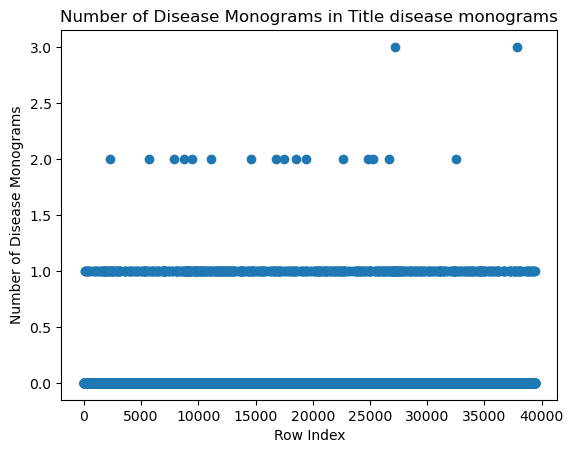

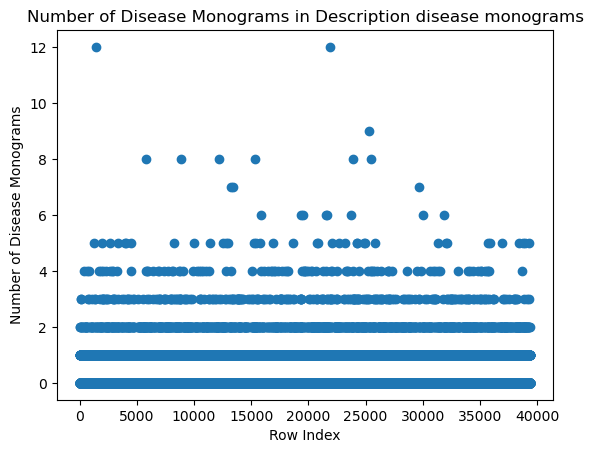

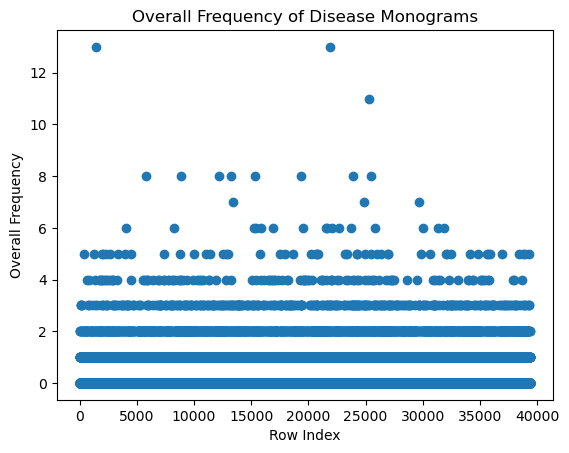

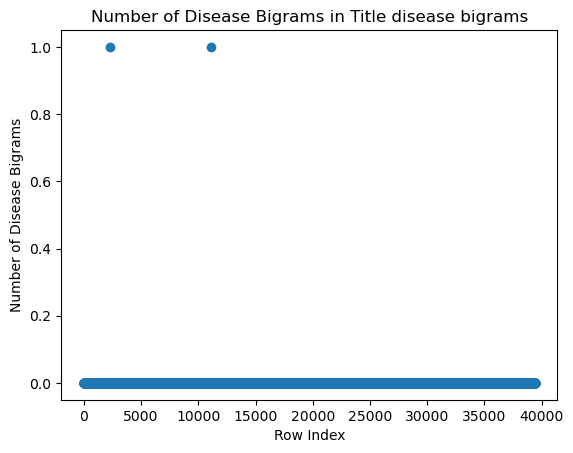

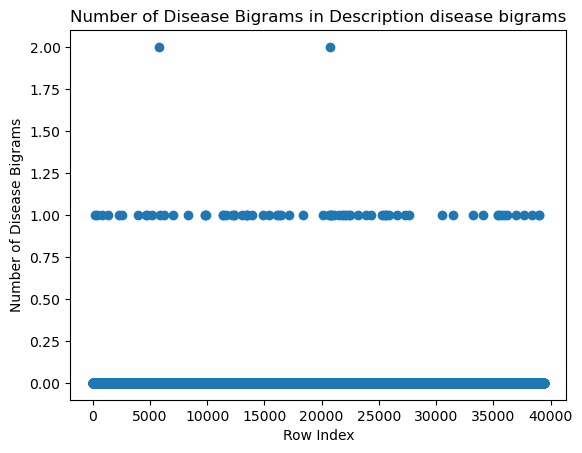

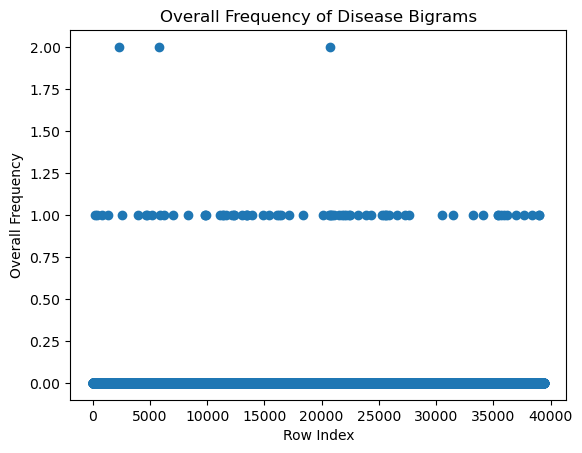

In [288]:
## df is still english_df, so not changing anything

import os
import matplotlib.pyplot as plt

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

##-----------------------PLOTS for Monograms-----------------

# Define the columns and plot titles
columns = ['disease_terms_title_monograms_count', 'disease_terms_description_monograms_count']
plot_titles = ['Title disease monograms', 'Description disease monograms']
plot_filenames = ['title_disease_monograms.png', 'description_disease_monograms.png']

# Generate plots for each column
for column, title, filename in zip(columns, plot_titles, plot_filenames):
    plt.scatter(range(len(english_df)), english_df[column])
    plt.xlabel('Row Index')
    plt.ylabel('Number of Disease Monograms')
    plt.title('Number of Disease Monograms in ' + title)
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename)
    plt.show()

# Generate plot for overall frequency
plt.scatter(range(len(english_df)), english_df['total_count_monograms_app'])
plt.xlabel('Row Index')
plt.ylabel('Overall Frequency')
plt.title('Overall Frequency of Disease Monograms')
plot_filename = os.path.join(plot_directory, 'overall_frequency_monograms.png')
plt.savefig(plot_filename)
plt.show()

##-----------------------PLOTS for Bigrams-----------------

# Define the columns and plot titles
columns = ['disease_terms_title_bigrams_count', 'disease_terms_description_bigrams_count']
plot_titles = ['Title disease bigrams', 'Description disease bigrams']
plot_filenames = ['title_disease_bigrams.png', 'description_disease_bigrams.png']

# Generate plots for each column
for column, title, filename in zip(columns, plot_titles, plot_filenames):
    plt.scatter(range(len(english_df)), english_df[column])
    plt.xlabel('Row Index')
    plt.ylabel('Number of Disease Bigrams')
    plt.title('Number of Disease Bigrams in ' + title)
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename)
    plt.show()

# Generate plot for overall frequency
plt.scatter(range(len(english_df)), english_df['total_count_bigrams_app'])
plt.xlabel('Row Index')
plt.ylabel('Overall Frequency')
plt.title('Overall Frequency of Disease Bigrams')
plot_filename = os.path.join(plot_directory, 'overall_frequency_bigrams.png')
plt.savefig(plot_filename)
plt.show()


In [289]:
df_monogram_1 = english_df[english_df['total_count_monograms_app'] != 0]
df_monogram_2 = english_df[english_df['total_count_monograms_app'] > 1]
df_bigram_1 = english_df[english_df['total_count_bigrams_app'] != 0]
df_bigram_2 = english_df[english_df['total_count_bigrams_app'] > 1]


# Number of rows in df_monogram_1
rows_monogram_1 = len(df_monogram_1)
print("Rows >0 monograms:", rows_monogram_1)

# Number of rows in df_monogram_2
rows_monogram_2 = df_monogram_2.shape[0]
print("Rows >1 monograms:", rows_monogram_2)

# Number of rows in df_bigram_1
rows_bigram_1 = len(df_bigram_1)
print("Rows >0 bigrams:", rows_bigram_1)

# Number of rows in df_bigram_2
rows_bigram_2 = df_bigram_2.shape[0]
print("Rows >1 bigrams:", rows_bigram_2)

##=======================Results=========================
# Rows >0 monograms: 11456
# Rows >1 monograms: 3166
# Rows >0 bigrams: 90
# Rows >1 bigrams: 5

Rows >0 monograms: 6804
Rows >1 monograms: 1849
Rows >0 bigrams: 75
Rows >1 bigrams: 3


0 32604
1 4955
2 1299
3 352
4 118
5 50
6 16
7 3
8 8
11 1
13 2


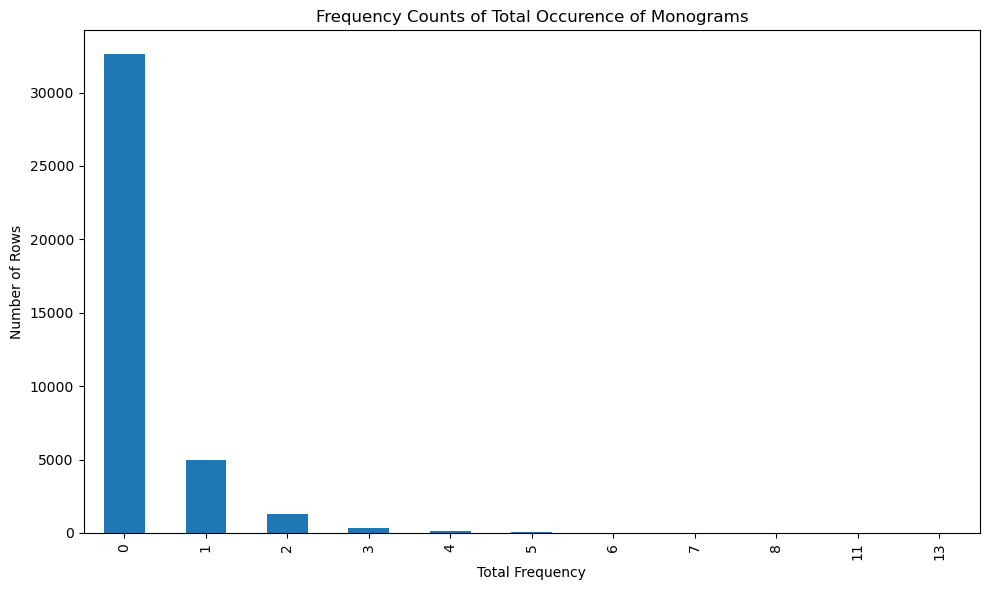

0 39333
1 72
2 3


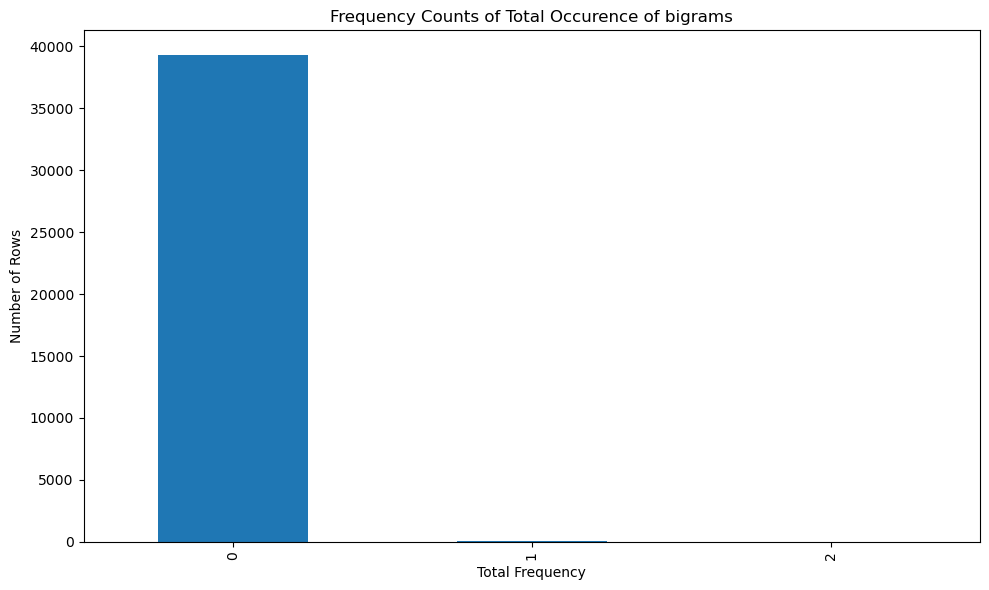

In [290]:
## Making plots for frequencies
### How many monograms and bigrams does each row have = to be precise
#------------------Monograms-------------------

# Assuming 'df' is your DataFrame
# Assuming 'total_count_monograms_app' is the name of the column with the sum of bigram frequencies

# Calculate the count of rows for each frequency value
frequency_counts = english_df['total_count_monograms_app'].value_counts().sort_index()

# Print the number of rows and corresponding frequency counts
for frequency, count in frequency_counts.items():
    print(frequency, count)

# Create a bar plot of the frequency counts
fig, ax = plt.subplots(figsize=(10, 6))
frequency_counts.plot.bar(ax=ax)
ax.set_xlabel('Total Frequency')
ax.set_ylabel('Number of Rows')
ax.set_title('Frequency Counts of Total Occurence of Monograms')
plt.tight_layout()
plt.show()

# ====== Results_for Android=================
# 0 52065
# 1 5018
# 2 1814
# 3 993
# 4 316
# 5 77
# 6 53
# 7 24
# 8 9
# 9 12
# 10 4
# 11 5
# 12 2
# 13 1
# ====== Results_for Apple=================
# 0 53364
# 1 8294
# 2 2311
# 3 624
# 4 186
# 5 91
# 6 30
# 7 12
# 8 10
# 9 4
# 10 10
# 11 1
# 12 1
# 13 1
#------------------Bigrams-------------------
# Assuming 'df' is your DataFrame
# Assuming 'total_count_monograms_app' is the name of the column with the sum of bigram frequencies

# Calculate the count of rows for each frequency value
frequency_counts = english_df['total_count_bigrams_app'].value_counts().sort_index()

# Print the number of rows and corresponding frequency counts
for frequency, count in frequency_counts.items():
    print(frequency, count)

# Create a bar plot of the frequency counts
fig, ax = plt.subplots(figsize=(10, 6))
frequency_counts.plot.bar(ax=ax)
ax.set_xlabel('Total Frequency')
ax.set_ylabel('Number of Rows')
ax.set_title('Frequency Counts of Total Occurence of bigrams')
plt.tight_layout()
plt.show()

# ====== Results_for Android=================
# 0 60306
# 1 74
# 2 9
# 3 4
# ====== Results_for Apple=================
# 0 64847
# 1 87
# 2 4
# 3 1

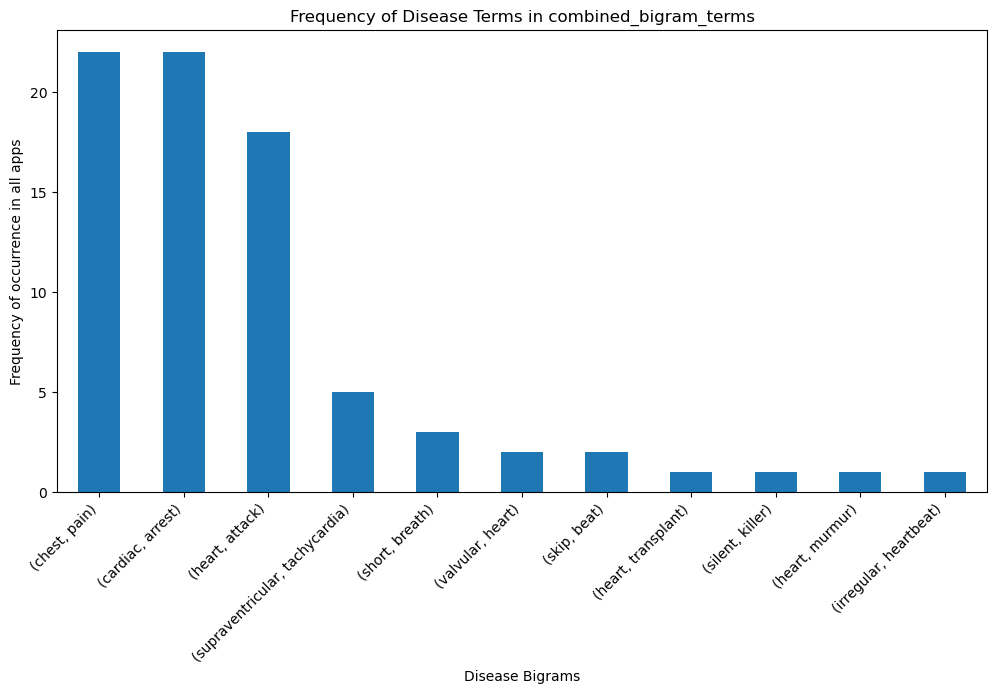

In [291]:
import matplotlib.pyplot as plt
import os

## I want to see the distibution of the monograms and bigrams in all of the selected apps in each of the dataframes
# df_monogram_1 = df[df['total_count_monograms_app'] != 0]
# df_monogram_2 = df[df['total_count_monograms_app'] > 1]
# df_bigram_1 = df[df['total_count_bigrams_app'] != 0]
# df_bigram_2 = df[df['total_count_bigrams_app'] > 1]


## All these apps have only one bigram - lets see which ones they are, and if they are relevant
## Counting the Frequency of IHD disease terms overall in the filtered apps
# Define a function to create a bar plot for a given column of disease terms

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = english_df[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(12, 6))
    term_counts.plot.bar(ax=ax)
    ax.set_xlabel('Disease Bigrams')
    ax.set_ylabel('Frequency of occurrence in all apps')
    ax.set_title(f'Frequency of Disease Terms in {column_name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_df_bigram_2.pdf')
# plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for


## Making and checking IHD dataframe

In [16]:
## Delete the apps where there are only one monogram overall, and those words are not too conclusive - such as 
#### blood, heart, pain, short, chest, cell, breath, transplant, mri, channel, diseas, 

## And then combining the dataframes from monograms
### And finally combining this with the apps selected from bigrams. They are overlapping 100%. Selecting from monograms was sufficient
#### Then why do I need bigrams at all? In further analysis perhaps? 

# There are 5018 apps which have only one monogram

temp_list_monograms = ['blood', 'heart', 'pain', 'short', 'chest', 'cell', 'breath', 'transplant', 'mri', 'channel', 'diseas', 'ace', 'receptor']
df_temp1 = english_df[(english_df['total_count_monograms_app'] == 1) & (~english_df['combined_monogram_terms'].apply(lambda x: any(word in x for word in temp_list_monograms)))]

# Print the resulting DataFrame
df_temp2 = english_df[(english_df['total_count_monograms_app'] > 1) & (english_df['combined_monogram_terms'].apply(lambda x: sum(word in x for word in temp_list_monograms) > 2))]

df_temp3 = english_df[(english_df['total_count_bigrams_app'] > 0)]


df_temp = pd.concat([df_temp1, df_temp2, df_temp3], ignore_index=True)

# Print the resulting DataFrame
df_temp

# ----------------Checking for common rows between apps selected from monograms and bigrams
# import pandas as pd

# # Assume df_temp and df_temp3 are the two data frames you want to compare

# # Merge the two data frames based on the "ID" column
# merged_df = pd.merge(df_temp['id'], df_temp3['id'], how='inner')

# # Get the count of common rows
# common_rows = merged_df.shape[0]

# print("Number of common rows:", common_rows)
#============There is only one common row from results. So we combine both dataframes

## ============Results======
## This gave 585 apps. These have only one monogram, but the monograms are useful. 
## I can add this to all the apps that have more than one monogram

#-------------------------------------------------checking---------------------------------------------------------------
## I checked if this worked, and looks like it did, although it was not obvious from the print function in the line above

# # For df_temp
# def plot_disease_terms(column_name, filename):
#     # Count the number of rows with each disease term in the column
#     term_counts = df_temp[column_name].explode().value_counts()
#     # Create a bar plot of the frequency for each disease term
#     fig, ax = plt.subplots(figsize=(12, 6))
#     term_counts.plot.bar(ax=ax)
#     ax.set_xlabel('Disease Monograms')
#     ax.set_ylabel('Number of Rows') # Is this calculating per row? Its not. Is that distinction important?
#     ax.set_title(f'Frequency of Disease Terms in {column_name}')
#     # Rotate the x-axis labels by 45 degrees
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#     fig.savefig(filename, dpi=300, bbox_inches='tight')

# # Call the function for each column of disease terms
# plot_disease_terms('combined_monogram_terms', 'combined_monogram_terms_df_temp.pdf')
# # plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for
# import pandas as pd

# # Assuming df_temp and df_monogram_2 are the two dataframes you want to combine
# combined_df_monogram = pd.concat([df_temp, df_monogram_2], ignore_index=True)

# # Print the combined dataframe
# print(combined_df_monogram)


# ## See if there are overlapping apps between apps selected from monograms and those selected from bigrams

# import pandas as pd

# # Assuming combined_df_monogram and df_bigram_1 are the two dataframes you want to check for overlapping rows based on the 'id' column
# merged_df = pd.merge(combined_df_monogram, df_bigram_1, on='id', how='outer', indicator=True)

# # Check if there are overlapping rows
# overlapping_rows = merged_df[merged_df['_merge'] == 'both']

# # Print the overlapping rows
# print(overlapping_rows)
# ##==================Results===========================
# # There are 87 overlapping rows, all of which are from the bigrams, which are also included in the apps selected from monograms


# #---------------------------Checking the apps that have one monogram and useless words - they are infact useless. can be removed--
# temp_list_monograms = ['blood', 'heart', 'pain', 'short', 'chest', 'cell', 'breath', 'transplant', 'mri', 'channel', 'diseas']
# df_temp2 = df[(df['total_count_monograms_app'] == 1) & (df['combined_monogram_terms'].apply(lambda x: any(word in x for word in temp_list_monograms)))]

# if not df_temp2.empty:
#     # Sample 5 rows from the resulting DataFrame
#     sample_df = df_temp2.sample(n=5)

#     # Print the 'combined_monogram_terms' column in the sample DataFrame
#     print(sample_df['description'])
# else:
#     print("No rows meet the given conditions.")

# =======================================984 IHD apps in Apple


id                           title  \
0                   com.BillDirkes.QuickEM                         QuickEM   
1                  com.motusglobal.motusqb                        PULSE QB   
2              com.manuelvicnt.Mindfulness      Present Mind - Mindfulness   
3           Desbrina.Medicine-Tracker-Lite                  Med Track Lite   
4         com.wingluntong.domesticfungshui          Fengshui FortuneTeller   
...                                    ...                             ...   
1676                   com.ewerk.happiness                    I-Positivity   
1677                       com.emedy.EMDDx                           EMDDx   
1678                greenpea.SeniorFitness  Shoulder Exercises For Seniors   
1679  greenpea.BackPainExercisesForSeniors  Low Back Exercises For Seniors   
1680                    nl.vr-lab.vrmobile    ZOLL's Virtual Rescue Mobile   

                                            description              released  \
0     QuickEM is a rapid bedside reference designed ...  2014-11-08T06:38:46Z   
1     PULSE is the heartbeat of your throwing routin...  2016-06-18T19:05:28Z   
2     This Present Mind - Mindfulness App is a great...  2016-12-13T02:34:10Z   
3     An app for tracking your medicine list. Notifi...  2012-09-07T14:34:24Z   
4     Watch Fengshui for your house yourself. And yo...  2020-06-10T07:00:00Z   
...                                                 ...                   ...   
1676  Have you recently experienced a heart attack? ...  2015-06-12T12:31:13Z   
1677  From common chief complaints such as chest pai...  2020-08-19T07:00:00Z   
1678  According the journal of Current Opinion in Rh...  2020-03-27T07:00:00Z   
1679  According to the journal of Current Opinion in...  2020-04-01T07:00:00Z   
1680  For more than 25 years, ZOLL professional defi...  2018-07-23T08:32:44Z   

                   updated required_os required_os_2021       size  \
0     2023-03-05T01:52:44Z        13.0              NaN   24338432   
1     2021-08-30T12:58:38Z        10.0              NaN  163262464   
2     2021-02-15T14:31:32Z        14.3             14.3  100043776   
3     2017-11-01T13:29:11Z        10.3             10.3   17192960   
4     2021-09-27T19:31:01Z        13.0             13.0   17435648   
...                    ...         ...              ...        ...   
1676  2016-02-15T22:02:15Z         8.0              8.0   70074368   
1677  2020-08-19T11:41:13Z         9.0              9.0   15868928   
1678  2020-03-27T14:53:04Z        13.0             13.0  107303936   
1679  2020-04-01T18:59:58Z        13.0             13.0   95583232   
1680  2021-06-04T12:09:34Z        12.0              NaN  660131840   

        size_2021  score  ...  disease_terms_description_monograms_count  \
0             NaN    0.0  ...                                          1   
1             NaN    0.0  ...                                          1   
2     100043776.0    0.0  ...                                          1   
3      17192960.0    0.0  ...                                          0   
4      17435648.0    0.0  ...                                          1   
...           ...    ...  ...                                        ...   
1676   70074368.0    0.0  ...                                          2   
1677   15868928.0    0.0  ...                                          2   
1678  107303936.0    0.0  ...                                          5   
1679   95583232.0    0.0  ...                                          5   
1680          NaN    0.0  ...                                          2   

      disease_terms_title_monograms_count  total_count_monograms_app  \
0                                       0                          1   
1                                       0                          1   
2                                       0                          1   
3                                       1                          1   
4               

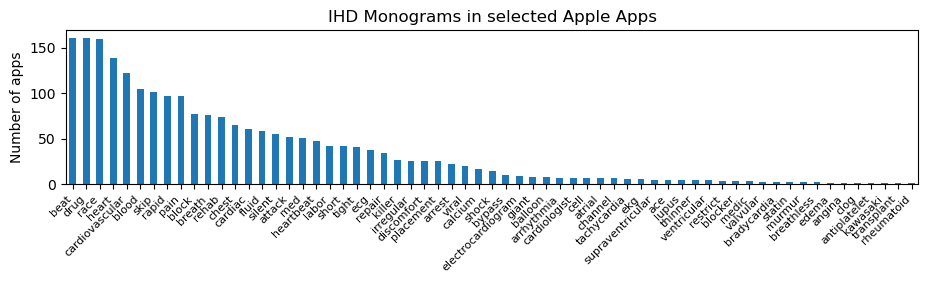

In [373]:
# # For df_monogram_1
# def plot_disease_terms(column_name, filename):
#     # Count the number of rows with each disease term in the column
#     term_counts = df_temp[column_name].explode().value_counts()
#     # Create a bar plot of the frequency for each disease term
#     fig, ax = plt.subplots(figsize=(8.27, 5.83))
#     term_counts.plot.bar(ax=ax)
#     ax.set_xlabel('Disease Monograms in selected Apps')
#     ax.set_ylabel('Frequency of occurence in all of the selected apps') # Is this calculating per row? Its not. Is that distinction important?
#     # This is only to see the distribution of monograms and bigrams, and see their names, so that we can select the apps accordingly
#     # We are not using these 'number of rows' directly, so its not relevant. I can change the name into frequency of occurence
#     ax.set_title(f'What kind of monograms are there in {column_name}')
#     # Rotate the x-axis labels by 45 degrees
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
#     plt.savefig(filename, dpi=300, bbox_inches='tight')
#     plt.show()

# # Define the plot directory
# plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# # Create the plot directory if it doesn't exist
# if not os.path.exists(plot_directory):
#     os.makedirs(plot_directory)

# # Call the function for each column of disease terms
# plot_disease_terms('combined_monogram_terms', 'Disease Monograms in selected IHD Apps.pdf')

#------------------------------
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have defined df_temp and other necessary variables

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = df_temp[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(11, 2))  # Adjust the figsize parameter here
    term_counts.plot.bar(ax=ax)
    # ax.set_xlabel('IHD Monograms in selected Apple Apps')
    ax.set_ylabel('Number of apps') 
    ax.set_title(f'IHD Monograms in selected Apple Apps')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Adjust fontsize as needed
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_monogram_terms', os.path.join(plot_directory, 'Disease_Monograms_in_selected_IHD_Apps.pdf'))


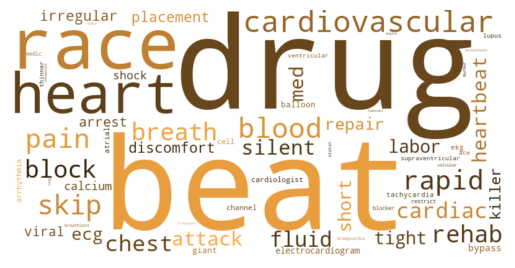

In [23]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=wc.get_single_color_func('#f1a340')).generate_from_frequencies(df_temp['combined_monogram_terms'].explode().value_counts())

fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
fig.savefig("apple_monograms.pdf", dpi=300)

In [343]:
# This if the final dataframe for IHD diseases. How relevant is it?
ihd_temp = df_temp

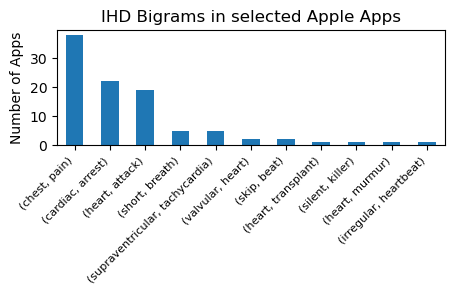

In [375]:
import matplotlib.pyplot as plt
import os

## I want to see the distibution of the monograms and bigrams in all of the selected apps in each of the dataframes
# df_monogram_1 = df[df['total_count_monograms_app'] != 0]
# df_monogram_2 = df[df['total_count_monograms_app'] > 1]
# df_bigram_1 = df[df['total_count_bigrams_app'] != 0]
# df_bigram_2 = df[df['total_count_bigrams_app'] > 1]


## All these apps have only one bigram - lets see which ones they are, and if they are relevant
## Counting the Frequency of IHD disease terms overall in the filtered apps
# Define a function to create a bar plot for a given column of disease terms

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = ihd_temp[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(5, 1.5))
    term_counts.plot.bar(ax=ax)
    # ax.set_xlabel('IHD Bigrams in selected Apple Apps')
    ax.set_ylabel('Number of Apps')
    ax.set_title(f'IHD Bigrams in selected Apple Apps')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_ihd_temp_bigram_2.pdf')
# plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for


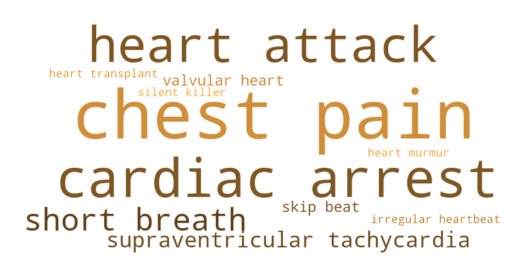

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=wc.get_single_color_func('#f1a340')).generate_from_frequencies(df_temp['combined_bigram_terms'].apply(lambda x: [' '.join(t) for t in x]).explode().value_counts())

fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
fig.savefig("apple_bigrams.pdf", dpi=300)

In [ ]:
import pandas as pd

# Assuming you have a CSV file called 'filename.csv' in the current directory

# Read the CSV file into a DataFrame
english_df = pd.read_csv('english_novet_google_apps.csv') # check if this is onlym

# ---------------------------Do this everytime the csv file is loaded-----------
# # # Evaluating strings that are actually lists into lists
import ast

english_df['description_monograms'] = english_df['description_monograms'].apply(ast.literal_eval)
english_df['title_monograms'] = english_df['title_monograms'].apply(ast.literal_eval)
english_df['summary_monograms'] = english_df['summary_monograms'].apply(ast.literal_eval)
english_df['summary_bigrams'] = english_df['summary_bigrams'].apply(ast.literal_eval)
english_df['description_bigrams'] = english_df['description_bigrams'].apply(ast.literal_eval)
english_df['title_bigrams'] = english_df['title_bigrams'].apply(ast.literal_eval)
# # -----------------------------Do it only once---------------------

In [ ]:
# Read the CSV file into a DataFrame
# english_df = pd.read_csv('english_novet_df.csv')

english_df['title_monograms'][0]

['fixit', 'mi', 'band', '2']

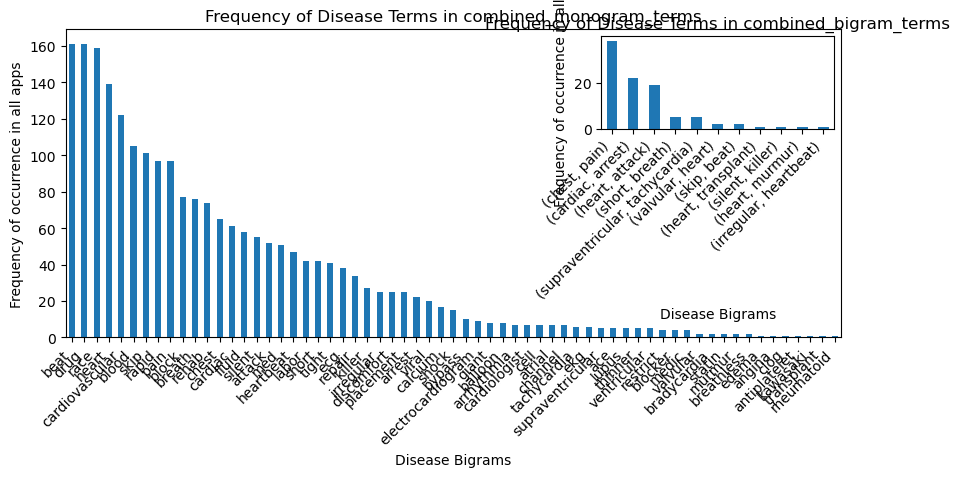

In [362]:
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define a function to create a bar plot for a given column of disease terms
def plot_disease_terms(column_name, filename, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 3))
    
    # Count the number of rows with each disease term in the column
    term_counts = ihd_temp[column_name].explode().value_counts()
    term_counts.plot.bar(ax=ax)
    
    ax.set_xlabel('Disease Bigrams')
    ax.set_ylabel('Frequency of occurrence in all apps')
    ax.set_title(f'Frequency of Disease Terms in {column_name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Save the plot if filename is provided
    if filename:
        plot_filename = os.path.join(plot_directory, filename)
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    
    return ax

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Create the main plot for monograms
fig, ax = plt.subplots(figsize=(10, 4))

# Call the function for the main plot (monograms)
plot_disease_terms('combined_monogram_terms', None, ax=ax)

# Create an inset_axes for embedding the bigrams plot inside the monograms plot
axins = inset_axes(ax, width="30%", height="30%", loc='upper right')

# Call the function for the embedded plot (bigrams)
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_ihd_temp_bigram_2.pdf', ax=axins)

plt.show()


## Checking how relevant the IHD apps are

attendings


/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_23043/4146003873.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(terms, rotation=45, ha='right')


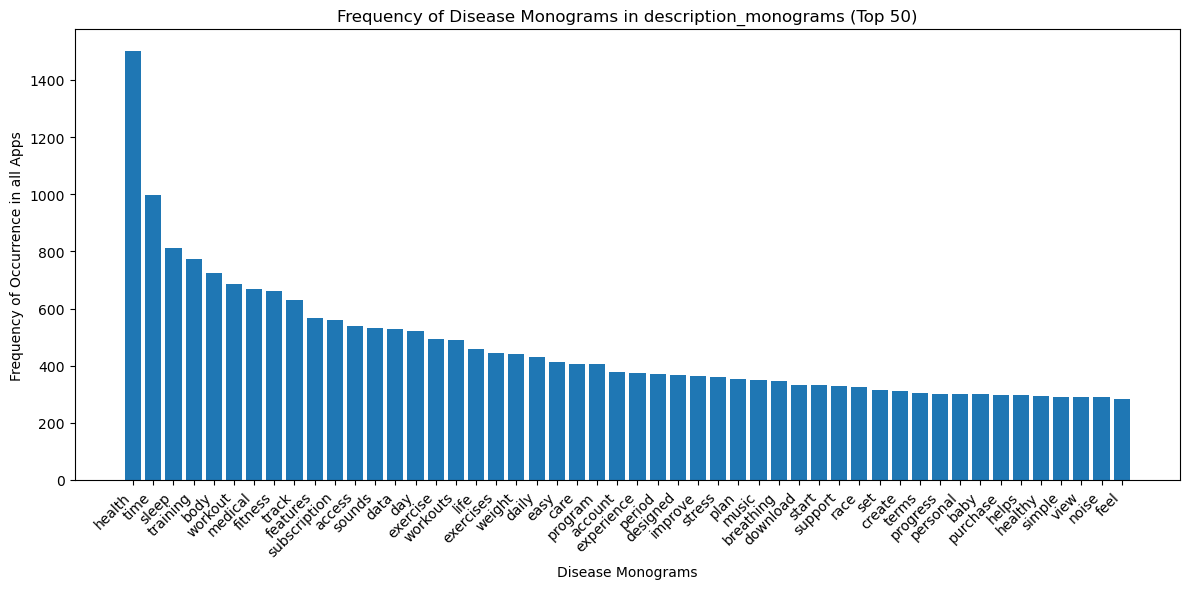

In [296]:
## This was before taking out some lonely bigrams

import matplotlib.pyplot as plt
from collections import Counter
import ast

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/ihd_apple_apps_plots' #change here

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)
    
def plot_disease_terms(column_name):
    # Flatten the list of disease terms in each row
    all_terms = [term for row_terms in df_temp[column_name] for term in row_terms]
    # Count the frequency of each disease term
    term_counts = Counter(all_terms)
    print(all_terms[11])
    # Select the top 100 most common disease terms
    top_terms = term_counts.most_common(50)
    # Extract the terms and their frequencies
    terms, frequencies = zip(*top_terms)
    # Create a bar plot of the frequencies
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(terms, frequencies)
    ax.set_xlabel('Disease Monograms')
    ax.set_ylabel('Frequency of Occurrence in all Apps')
    ax.set_title(f'Frequency of Disease Monograms in {column_name} (Top 50)')
    ax.set_xticklabels(terms, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # plot_filename = os.path.join(plot_directory, f'{ax.get_title()}_{which_disease}.png')
    fig.savefig(plot_filename)

# Call the function for each column of disease terms
plot_disease_terms('description_monograms')


In [297]:
# Calculate string lengths and create a new column
df_temp['description_length'] = df_temp['description'].apply(len)

### Saving the CSV files

In [298]:
# Making CSV for IHD diseases
ihd_temp = df_temp

import pandas as pd

# Assuming your DataFrame is named df
ihd_temp.to_csv('IHD_apple_apps.csv', index=False) #change the file name here


In [299]:
# Create a new DataFrame by dropping columns from the original DataFrame
ihd_temp_to_plot = ihd_temp[['id', 'title', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 
                             'reviews', 'reviews_2021', 'currency_2021',
                             'category', 'genres', 'languages', 'price', 'price_2021', 'currency', 'description']]
ihd_temp_to_plot
# Saving the csv file
ihd_temp_to_plot.to_csv('IHD_apple_to_plot.csv', index=False) #change the file name here

'id', 'title', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 
                             'reviews', 'reviews_2021', 'currency_2021', 
                             'category', 'genres', 'languages', 'price', 'price_2021', 'currency'

### ---------------------- Break Point -------------------------

In [300]:
import pandas as pd

# Assuming you have a CSV file called 'filename.csv' in the current directory

# Read the CSV file into a DataFrame
ihd_temp = pd.read_csv('IHD_apple_apps.csv') # check if this is onlym

# ---------------------------Do this everytime the csv file is loaded-----------
# # # Evaluating strings that are actually lists into lists
import ast

ihd_temp['description_monograms'] = ihd_temp['description_monograms'].apply(ast.literal_eval)
ihd_temp['title_monograms'] = ihd_temp['title_monograms'].apply(ast.literal_eval)
# ihd_temp['summary_monograms'] = ihd_temp['summary_monograms'].apply(ast.literal_eval)
# ihd_temp['summary_bigrams'] = ihd_temp['summary_bigrams'].apply(ast.literal_eval)
ihd_temp['description_bigrams'] = ihd_temp['description_bigrams'].apply(ast.literal_eval)
ihd_temp['title_bigrams'] = ihd_temp['title_bigrams'].apply(ast.literal_eval)
# # -----------------------------Do it only once---------------------
# Read the CSV file into a DataFrame
# english_df = pd.read_csv('english_novet_df.csv')

ihd_temp['title_monograms'][0]

['quickem']

### Explorative Data Analysis

In [301]:
# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = ihd_temp[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(15, 6))
    term_counts.plot.bar(ax=ax)
    ax.set_xlabel('Disease Monograms in selected Apps')
    ax.set_ylabel('Frequency of occurence in all of the selected apps') # Is this calculating per row? Its not. Is that distinction important?
    # This is only to see the distribution of monograms and bigrams, and see their names, so that we can select the apps accordingly
    # We are not using these 'number of rows' directly, so its not relevant. I can change the name into frequency of occurence
    ax.set_title(f'What kind of monograms are there in {column_name}')
    # Rotate the x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plt.savefig(filename, dpi=300, bbox_inches='tight')

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_monogram_terms', 'Disease Monograms in selected IHD Apps.pdf')

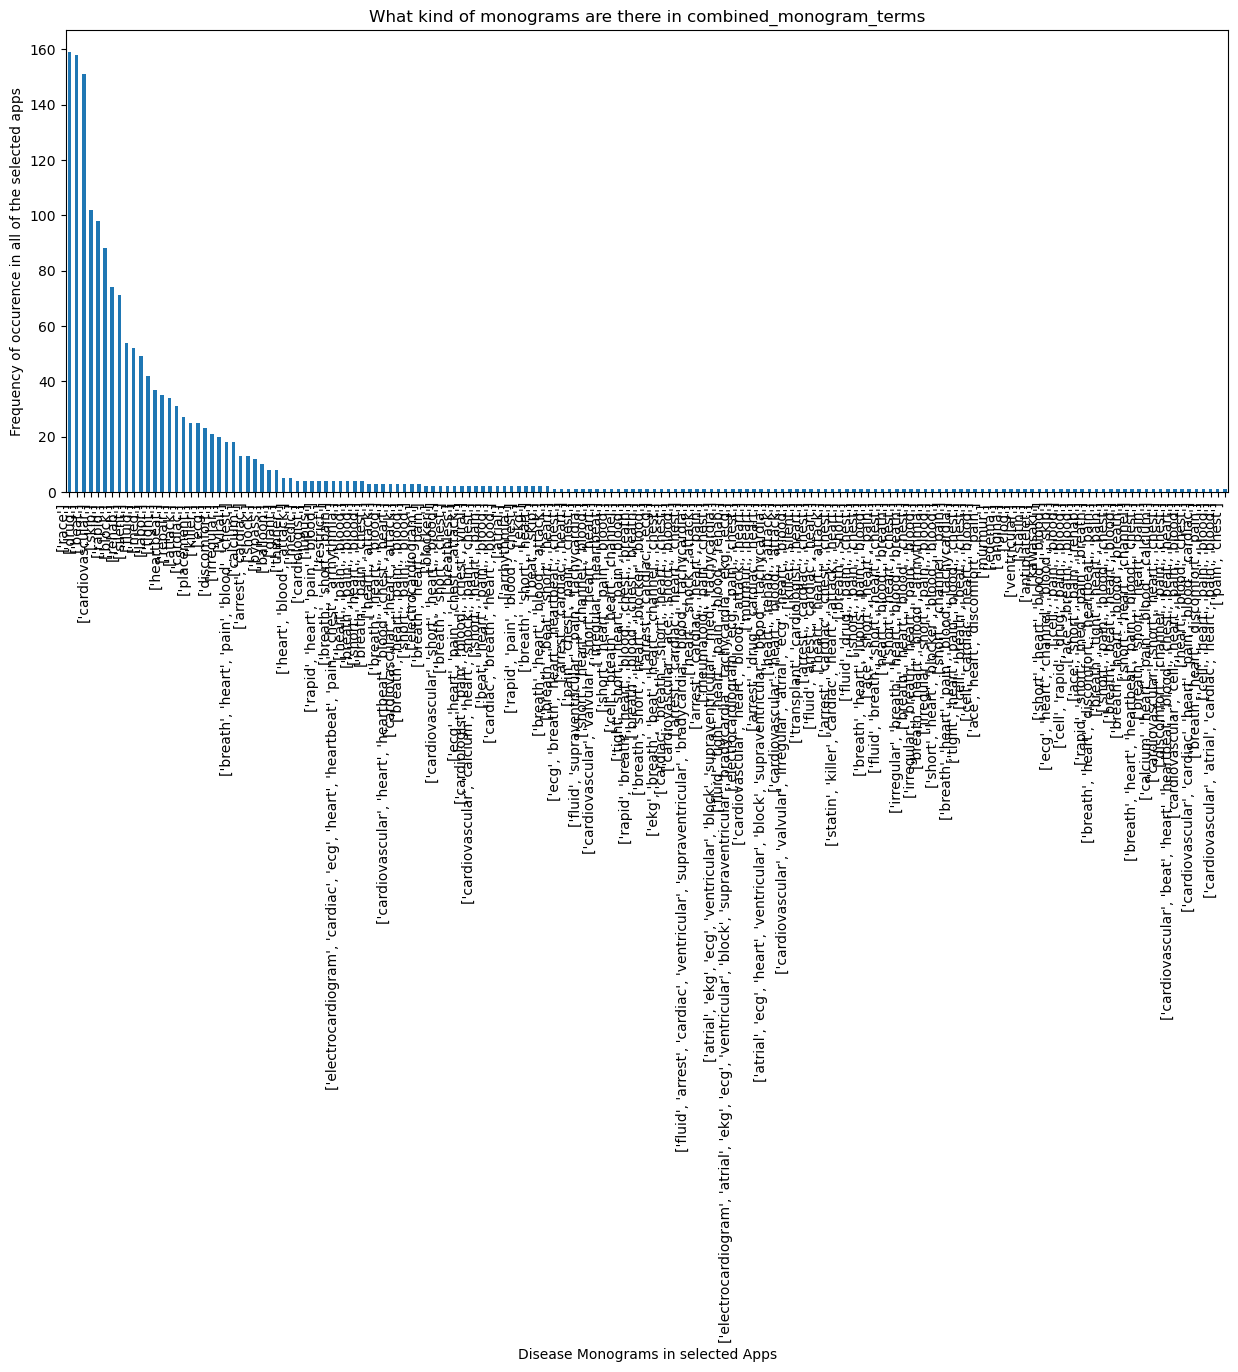

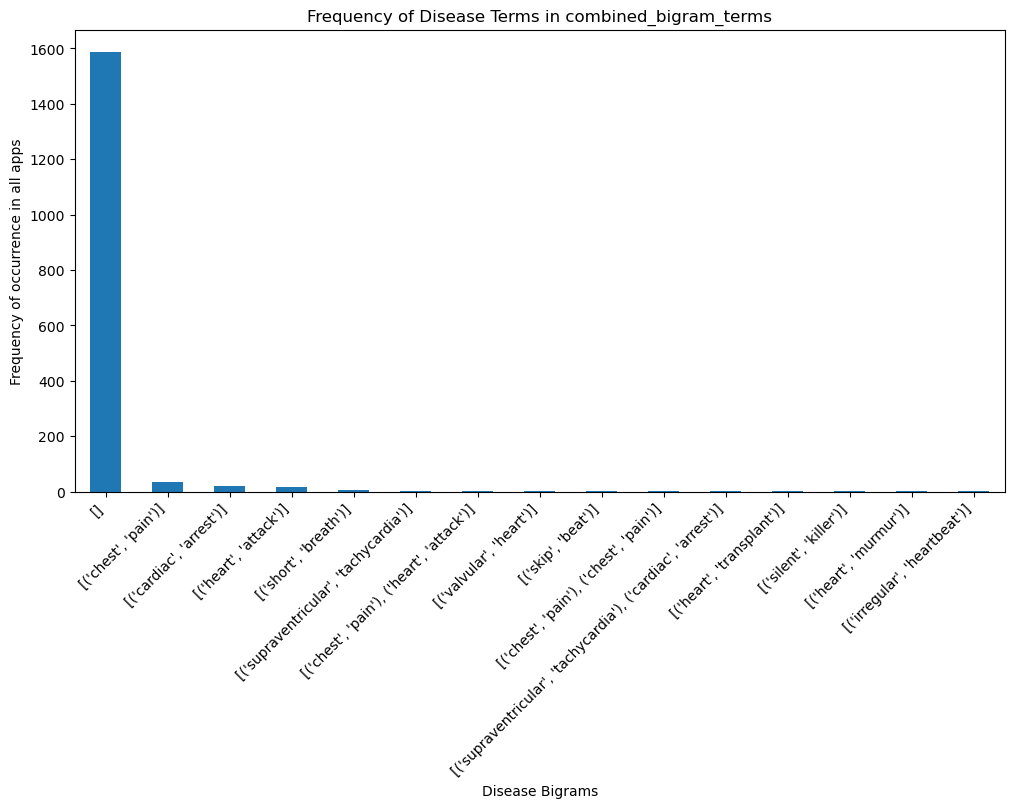

In [302]:
import matplotlib.pyplot as plt
import os

## I want to see the distibution of the monograms and bigrams in all of the selected apps in each of the dataframes
# df_monogram_1 = df[df['total_count_monograms_app'] != 0]
# df_monogram_2 = df[df['total_count_monograms_app'] > 1]
# df_bigram_1 = df[df['total_count_bigrams_app'] != 0]
# df_bigram_2 = df[df['total_count_bigrams_app'] > 1]


## All these apps have only one bigram - lets see which ones they are, and if they are relevant
## Counting the Frequency of IHD disease terms overall in the filtered apps
# Define a function to create a bar plot for a given column of disease terms

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = ihd_temp[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(12, 6))
    term_counts.plot.bar(ax=ax)
    ax.set_xlabel('Disease Bigrams')
    ax.set_ylabel('Frequency of occurrence in all apps')
    ax.set_title(f'Frequency of Disease Terms in {column_name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/apple_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_ihd_temp_bigram_2.pdf')
# plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for


## Checking how relevant the IHD apps are

attendings


/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_23043/801450305.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(terms, rotation=45, ha='right')


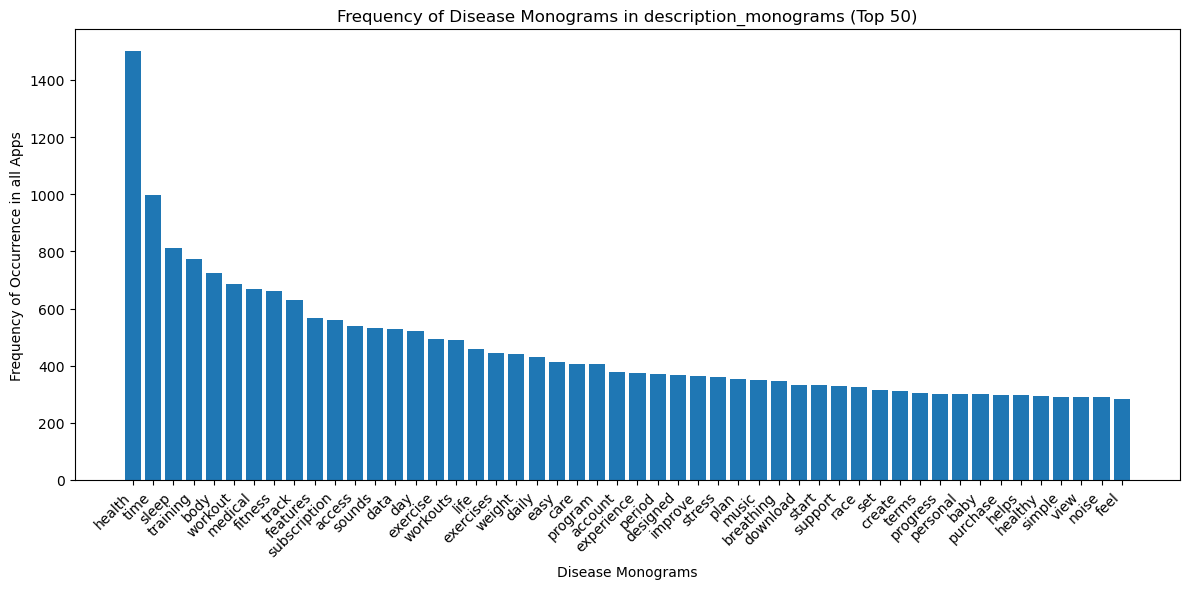

In [303]:
## This was before taking out some lonely bigrams

import matplotlib.pyplot as plt
from collections import Counter
import ast

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/ihd_apple_apps_plots' #change here

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)
    
def plot_disease_terms(column_name):
    # Flatten the list of disease terms in each row
    all_terms = [term for row_terms in ihd_temp[column_name] for term in row_terms]
    # Count the frequency of each disease term
    term_counts = Counter(all_terms)
    print(all_terms[11])
    # Select the top 100 most common disease terms
    top_terms = term_counts.most_common(50)
    # Extract the terms and their frequencies
    terms, frequencies = zip(*top_terms)
    # Create a bar plot of the frequencies
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(terms, frequencies)
    ax.set_xlabel('Disease Monograms')
    ax.set_ylabel('Frequency of Occurrence in all Apps')
    ax.set_title(f'Frequency of Disease Monograms in {column_name} (Top 50)')
    ax.set_xticklabels(terms, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # plot_filename = os.path.join(plot_directory, f'{ax.get_title()}_{which_disease}.png')
    fig.savefig(plot_filename)

# Call the function for each column of disease terms
plot_disease_terms('description_monograms')


In [304]:
# Calculate string lengths and create a new column
df_temp['description_length'] = df_temp['description'].apply(len)

### Saving the CSV files

In [305]:
# Making CSV for IHD diseases
ihd_temp = df_temp

import pandas as pd

# Assuming your DataFrame is named df
ihd_temp.to_csv('IHD_apple_apps.csv', index=False) #change the file name here


In [306]:
# Create a new DataFrame by dropping columns from the original DataFrame
ihd_temp_to_plot = ihd_temp[['id', 'title', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 
                             'reviews', 'reviews_2021', 'currency_2021',
                             'category', 'genres', 'languages', 'price', 'price_2021', 'currency', 'description', 'description_length', 'required_os']]
ihd_temp_to_plot
# Saving the csv file
ihd_temp_to_plot.to_csv('IHD_apple_to_plot.csv', index=False) #change the file name here

'id', 'title', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 
                             'reviews', 'reviews_2021', 'currency_2021', 
                             'category', 'genres', 'languages', 'price', 'price_2021', 'currency'

### ------------------Break Point---------------------------

## Simple descriptive analysis 

In [307]:
folder_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps"  # Specify the folder path where your CSV files are located
file_extensions = [".csv"]  # Specify the file extensions of the files you want to load
os.chdir(folder_path)  # Set the current working directory to the folder path

# Read the CSV file into a DataFrame
ihd_df = pd.read_csv('IHD_apple_to_plot.csv')

In [308]:
import matplotlib.pyplot as plt

# Enable interactive mode to prevent figures from displaying immediately
plt.ioff()

# Set the savefig directory and format
savefig_dir = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/IHD_paper1_plots'
savefig_format = 'png'

# Define a function to save the current figure
def save_figure(fig_name):
    fig_path = f'{savefig_dir}/{fig_name}.{savefig_format}'
    plt.savefig(fig_path, format=savefig_format)
    print(f'Saved figure: {fig_path}')

# Disable interactive mode at the end of the notebook
def disable_interactive_mode():
    plt.close('all')
    plt.ion()

# Call the disable_interactive_mode function at the end of the notebook
import atexit
atexit.register(disable_interactive_mode)

## Correlation analysis
## Correlation without ratings and reviews
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
# all_ihd_df = pd.read_csv('your_data.csv')

#----------------------- organising different columns---------


# Replace 'Varies with device' with NaN values in the 'size' column
ihd_df['size'] = ihd_df['size'].replace('Varies with device', np.nan)

def convert_to_millions(size):
    if pd.isna(size):
        return size
    return size / 1000000  # Convert size to millions

# Apply the function to the 'size' column
ihd_df['size_mb'] = ihd_df['size'].apply(convert_to_millions)

#---------------------------released year, updated year


# X = ihd_df[['released_year', 'updated_year', 'size_mb', 'required_os_num', 'price', 'score', 'description_length', 'genres']]
# 


# Replace the second dot and the following number
ihd_df['required_os_num'] = ihd_df['required_os'].str.replace(r'\.(?=.*\.)', '', regex=True).astype(float)
# Replace the second dot and the following number
ihd_df['released_year'] = ihd_df['released'].str[:4].astype(int)
ihd_df['updated_year'] = ihd_df['updated'].str[:4].astype(int)

### Avg size of apps

Average size of IHD Apps:  76.290644728138 MB


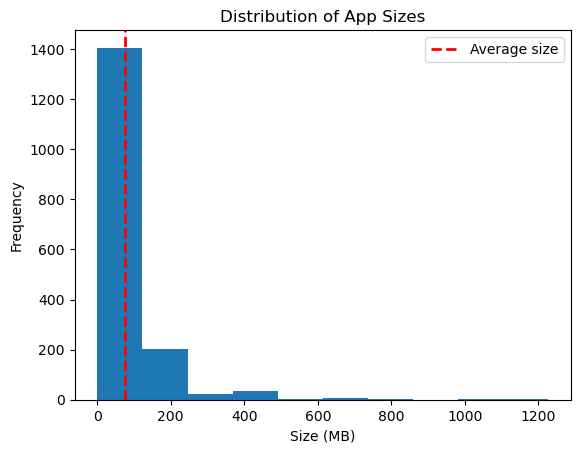

In [309]:
# Take the average, excluding NaN values
avg_size = np.nanmean(ihd_df['size_mb'])

# Print the average size
print("Average size of IHD Apps: ", avg_size, "MB")

# Plot a histogram
plt.hist(ihd_df['size_mb'].dropna())
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.axvline(avg_size, color='red', linestyle='dashed', linewidth=2, label='Average size')
plt.legend()
plt.show()
plt.savefig('Distribution of IHD App Sizes.png')



## Numebr of reviews

For IHD: 
Percentage of rows with zero values: 79.06%
Percentage of rows with non-zero values: 20.94%
Range of values: 0 - 8712
Average value: 17.932778108268888
Mode: 17.932778108268888
Range 0 - 1: 1329
Range 1 - 10: 256
Range 10 - 100: 70
Range 100 - 1000: 22
Range 1000 - 10000: 4
Range 10000 - 100000: 0


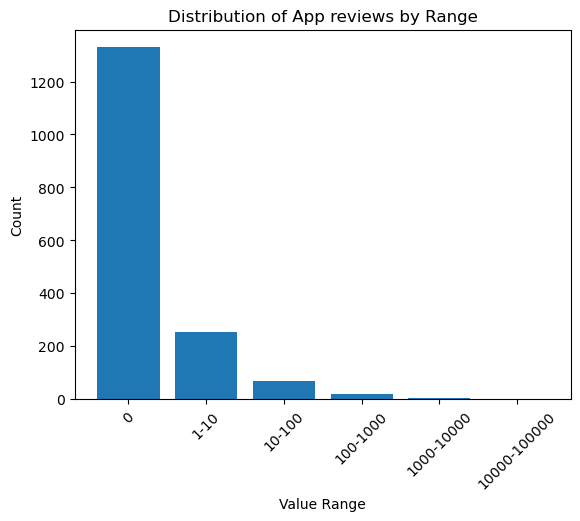

IHD_reviews_range0_1:
                                        id                           title  \
0                   com.BillDirkes.QuickEM                         QuickEM   
1                  com.motusglobal.motusqb                        PULSE QB   
2              com.manuelvicnt.Mindfulness      Present Mind - Mindfulness   
3           Desbrina.Medicine-Tracker-Lite                  Med Track Lite   
4         com.wingluntong.domesticfungshui          Fengshui FortuneTeller   
...                                    ...                             ...   
1676                   com.ewerk.happiness                    I-Positivity   
1677                       com.emedy.EMDDx                           EMDDx   
1678                greenpea.SeniorFitness  Shoulder Exercises For Seniors   
1679  greenpea.BackPainExercisesForSeniors  Low Back Exercises For Seniors   
1680                    nl.vr-lab.vrmobile    ZOLL's Virtual Rescue Mobile   

                  released               

In [310]:

# Reviews - basic analysis

print("For IHD: ")
# ------------------------------ for df2---------------------------
#import numpy as np
# import math

# Calculate the percentage of rows with zero values
zero_percent = (ihd_df['reviews'] == 0).mean() * 100

# Calculate the percentage of rows with non-zero values
non_zero_percent = (ihd_df['reviews'] != 0).mean() * 100

# Print the results
print(f"Percentage of rows with zero values: {zero_percent:.2f}%")
print(f"Percentage of rows with non-zero values: {non_zero_percent:.2f}%")

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['reviews'])
max_value = np.nanmax(ihd_df['reviews'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['reviews'])
# Find the mode
mode_value = np.nanmean(ihd_df['reviews'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

ranges = [0, 1, 10, 100, 1000, 10000, 100000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['reviews'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# # Find the rows in the range 10000-100000
# rows_in_range = df[(df['price'] >= 10000) & (df['price'] <= 100000)]

# # Print the rows in the range
# print(rows_in_range)

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of App reviews by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

#============================================
# For IHD: 
# Percentage of rows with zero values: 77.36%
# Percentage of rows with non-zero values: 22.64%
# Range of values: 0.0 - 493098.0
# Average value: 186.19139582352017
# Mode: 186.19139582352017
# Range 0 - 1: 4988
# Range 1 - 10: 671
# Range 10 - 100: 508
# Range 100 - 1000: 156
# Range 1000 - 10000: 36
# Range 10000 - 100000: 7

# Create separate dataframes for each reviews range
IHD_reviews_range0_1 = ihd_df[ihd_df['reviews'].between(0, 1)]
IHD_reviews_range1_10 = ihd_df[ihd_df['reviews'].between(1, 10)]
IHD_reviews_range10_100 = ihd_df[ihd_df['reviews'].between(10, 100)]
IHD_reviews_range100_1000 = ihd_df[ihd_df['reviews'].between(100, 1000)]
IHD_reviews_range1000_10000 = ihd_df[ihd_df['reviews'].between(1000, 10000)]
IHD_reviews_range10000_100000 = ihd_df[ihd_df['reviews'].between(10000, 100000)]

# Print the dataframes
print("IHD_reviews_range0_1:")
print(IHD_reviews_range0_1)
print()

print("IHD_reviews_range1_10:")
print(IHD_reviews_range1_10)
print()

print("IHD_reviews_range10_100:")
print(IHD_reviews_range10_100)
print()

print("IHD_reviews_range100_1000:")
print(IHD_reviews_range100_1000)
print()

print("IHD_reviews_range1000_10000:")
print(IHD_reviews_range1000_10000)
print()

print("IHD_reviews_range10000_100000:")
print(IHD_reviews_range10000_100000)
print()



### scores averages

For IHD: 
Range of values: 0.0 - 5.0
Average value: 0.8932665437239738
Mode: 0.8932665437239738


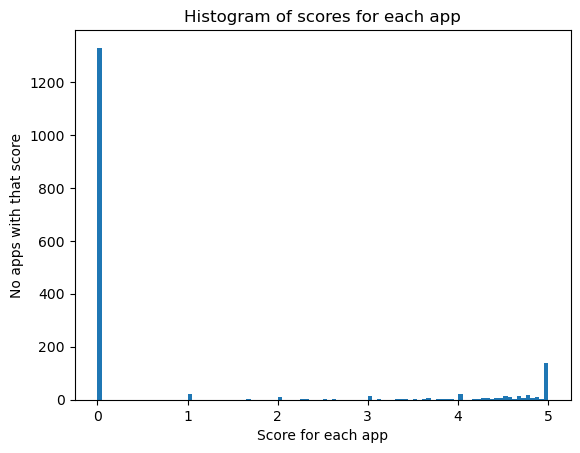

1329
Range 0 - 1: 1329
Range 1 - 2: 21
Range 2 - 3: 16
Range 3 - 4: 37
Range 4 - 5: 278


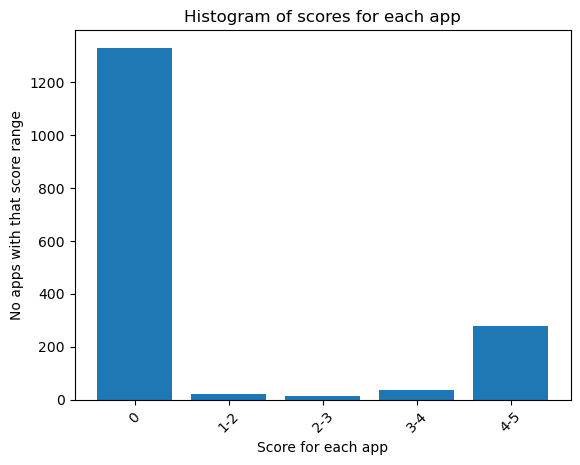

In [311]:

print("For IHD: ")
#import numpy as np

# df = final_screened_IHD

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['score'])
max_value = np.nanmax(ihd_df['score'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['score'])
# Find the mode
mode_value = np.nanmean(ihd_df['score'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

# Plot the histogram
plt.hist(ihd_df['score'], bins=100)  # Adjust the number of bins as needed
plt.ticklabel_format(style='plain')

# Add labels and title
plt.xlabel('Score for each app')
plt.ylabel('No apps with that score')
plt.title('Histogram of scores for each app')

# Show the plot
plt.show()

# For df2: 
# Range of values: 0.0 - 5.0
# Average value: 0.9591326138736265
# Mode: 0.9591326138736265

#-----------------------------

#The above plot gave the number of ratings across the apps. Now we want to see their distribution

zero_count = len(ihd_df[ihd_df['score'] == 0])
print(zero_count)

ranges = [0, 1, 2, 3, 4, 5]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['score'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))]
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
# Add labels and title
plt.xlabel('Score for each app')
plt.ylabel('No apps with that score range')
plt.title('Histogram of scores for each app')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

# =============Results==================
# For IHD: 
# Range of values: 0.0 - 5.0
# Average value: 0.9343556950541686
# Mode: 0.9343556950541686
# 4948 apps have 0 as the score for rating
# these are probably the same ones with out any ratings. We will compare these apps for  their number of installs # Futher analysis

# Range 0.0 - 0.01: 4948
# Range 0.01 - 1.0: 0
# Range 1.0 - 2.0: 7
# Range 2.0 - 3.0: 55
# Range 3.0 - 4.0: 383
# Range 4.0 - 5.0: 976 - There are alot of apps with a good rating score

### App prices

For IHD: 
Percentage of rows with zero values: 88.99%
Percentage of rows with non-zero values: 11.01%
Range of values: 0 - 24900
Average value: 69.4330755502677
Mode: 69.4330755502677
Range 0 - 1: 1496
Range 1 - 100: 53
Range 100 - 1000: 115
Range 1000 - 10000: 16
Range 10000 - 100000: 1


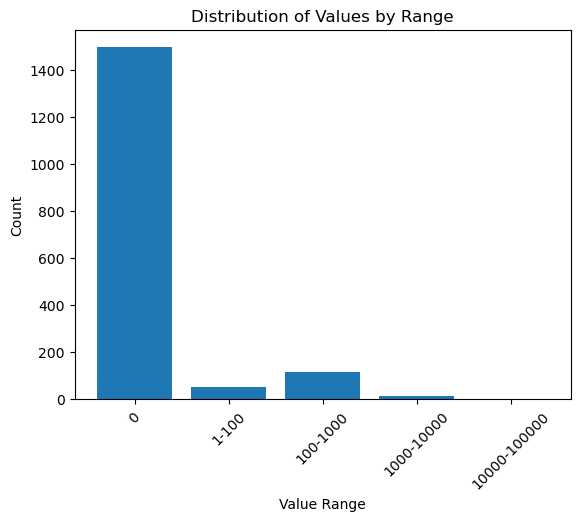

IHD_price_range0_1:
                                        id                           title  \
1                  com.motusglobal.motusqb                        PULSE QB   
2              com.manuelvicnt.Mindfulness      Present Mind - Mindfulness   
3           Desbrina.Medicine-Tracker-Lite                  Med Track Lite   
4         com.wingluntong.domesticfungshui          Fengshui FortuneTeller   
6                          com.nurokor.dna               KorDNA by NuroKor   
...                                    ...                             ...   
1675               com.enproinc.inspectaed                      InspectAED   
1676                   com.ewerk.happiness                    I-Positivity   
1678                greenpea.SeniorFitness  Shoulder Exercises For Seniors   
1679  greenpea.BackPainExercisesForSeniors  Low Back Exercises For Seniors   
1680                    nl.vr-lab.vrmobile    ZOLL's Virtual Rescue Mobile   

                  released               up

In [312]:
print("For IHD: ")
# ------------------------------ for df2---------------------------
#import numpy as np
# import math

# Calculate the percentage of rows with zero values
zero_percent = (ihd_df['price'] == 0).mean() * 100

# Calculate the percentage of rows with non-zero values
non_zero_percent = (ihd_df['price'] != 0).mean() * 100

# Print the results
print(f"Percentage of rows with zero values: {zero_percent:.2f}%")
print(f"Percentage of rows with non-zero values: {non_zero_percent:.2f}%")

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['price'])
max_value = np.nanmax(ihd_df['price'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['price'])
# Find the mode
mode_value = np.nanmean(ihd_df['price'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

ranges = [0, 1, 100, 1000, 10000, 100000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['price'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")


# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of Values by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

# ======================Results===============
# Range 0 - 1: 6012
# Range 1 - 100: 62
# Range 100 - 1000: 315
# Range 1000 - 10000: 50
# Range 10000 - 100000: 9

# Most apps are free of charge, an those who have price are in the range - 100-1000. this is a good df for # further analysis

# Create separate dataframes for each price range
IHD_price_range0_1 = ihd_df[ihd_df['price'].between(0, 1)]
IHD_price_range1_100 = ihd_df[ihd_df['price'].between(1, 100)]
IHD_price_range100_1000 = ihd_df[ihd_df['price'].between(100, 1000)]
IHD_price_range1000_10000 = ihd_df[ihd_df['price'].between(1000, 10000)]
IHD_price_range10000_100000 = ihd_df[ihd_df['price'].between(10000, 100000)]

# Print the dataframes
print("IHD_price_range0_1:")
print(IHD_price_range0_1)
print()

print("IHD_price_range1_100:")
print(IHD_price_range1_100)
print()

print("IHD_price_range100_1000:")
print(IHD_price_range100_1000)
print()

print("IHD_price_range1000_10000:")
print(IHD_price_range1000_10000)
print()

print("IHD_price_range10000_100000:")
print(IHD_price_range10000_100000)
print()


In [313]:
IHD_price_range10000_100000

id                          title  \
334  com.mcGrawHill.harrisons21  Harrison’s Internal Med. 21/E   

                 released               updated required_os required_os_2021  \
334  2022-07-28T07:00:00Z  2022-10-23T21:53:54Z        10.0              NaN   

           size  size_2021  score  score_2021  ...  price  price_2021  \
334  1014387712        NaN    3.0         NaN  ...  24900         NaN   

    currency                                        description  \
334      INR  The Voice of Clinical Reason\n\nHarrison’s Pri...   

    description_length required_os.1      size_mb  required_os_num  \
334               3239          10.0  1014.387712             10.0   

    released_year updated_year  
334          2022         2022  

[1 rows x 26 columns]

[  499     0   999   199    99   299   399  1999   699 24900   799  1499
  5900  1299  3999  3499  2999  2299   599]


<Figure size 640x480 with 0 Axes>

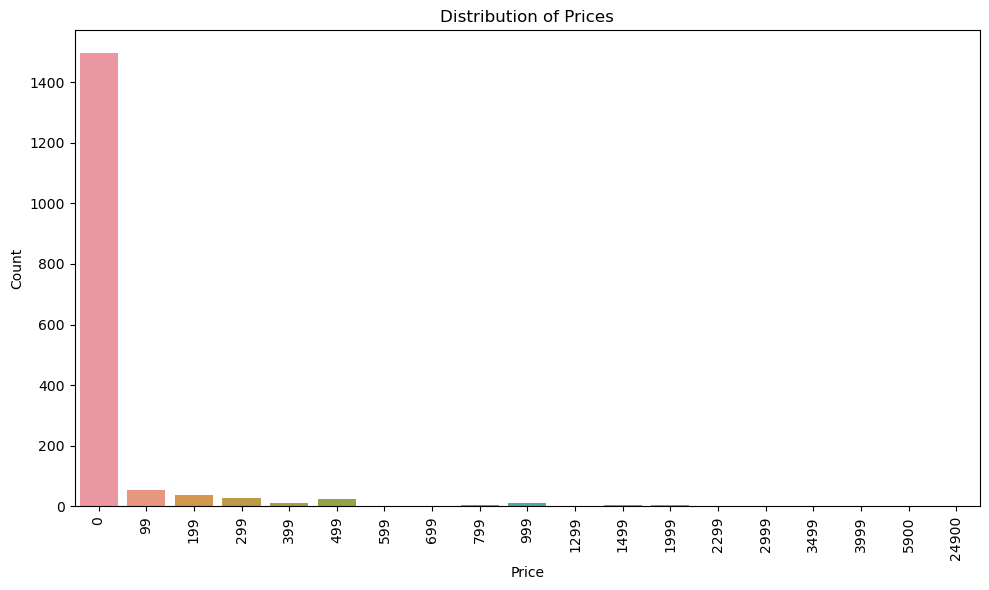

In [314]:
# Get all unique values in the 'Column1' column
unique_values = ihd_df['price'].unique()

print(unique_values)
### All app prices are in INR
### These are the unique price values
# [  499     0   999   199    99   299   399  1999   699 24900   799  1499
#   5900  3999  2299]
#ANother price graph
import seaborn as sns

# Get the unique values and their counts in the "price" column
price_counts = ihd_df['price'].value_counts()

# Sort the unique values in ascending order
sorted_prices = price_counts.index.sort_values(ascending=True)

# Create a bar plot of prices and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_prices, y=price_counts[sorted_prices])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

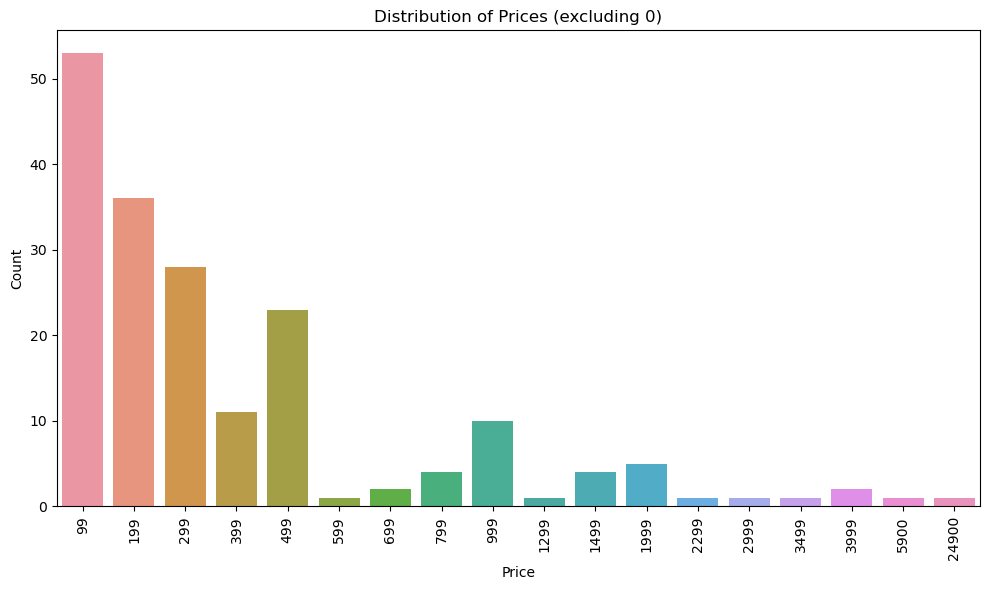

In [315]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Filter out rows with price equal to 0
non_zero_prices = ihd_df[ihd_df['price'] != 0]

# Get the unique non-zero values and their counts in the "price" column
price_counts = non_zero_prices['price'].value_counts()

# Sort the unique values in ascending order
sorted_prices = price_counts.index.sort_values(ascending=True)

# Create a bar plot of prices and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_prices, y=price_counts[sorted_prices])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices (excluding 0)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Description length

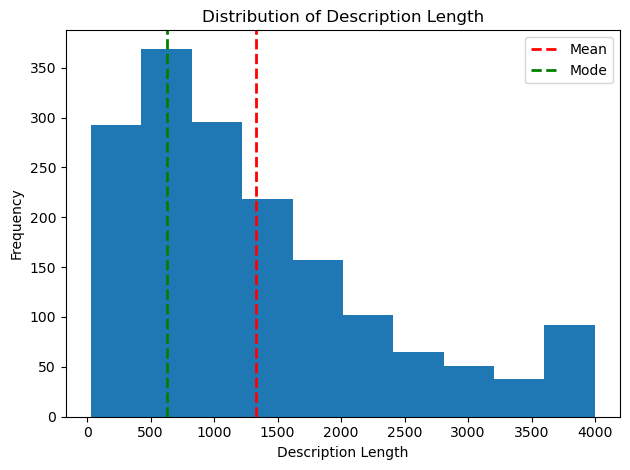

In [316]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
from scipy.stats import mode

# Calculate the average description length
avg_description_length = np.nanmean(ihd_df['description_length'])

# Calculate the mode
bin_counts = np.bincount(ihd_df['description_length'].dropna())
mode_description_length = np.argmax(bin_counts)

# Plot a histogram
plt.hist(ihd_df['description_length'].dropna(), bins=10)
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Length')

# Plot vertical lines for mode and mean
plt.axvline(avg_description_length, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_description_length, color='green', linestyle='dashed', linewidth=2, label='Mode')

plt.legend()
plt.tight_layout()
plt.show()


## required_os_num

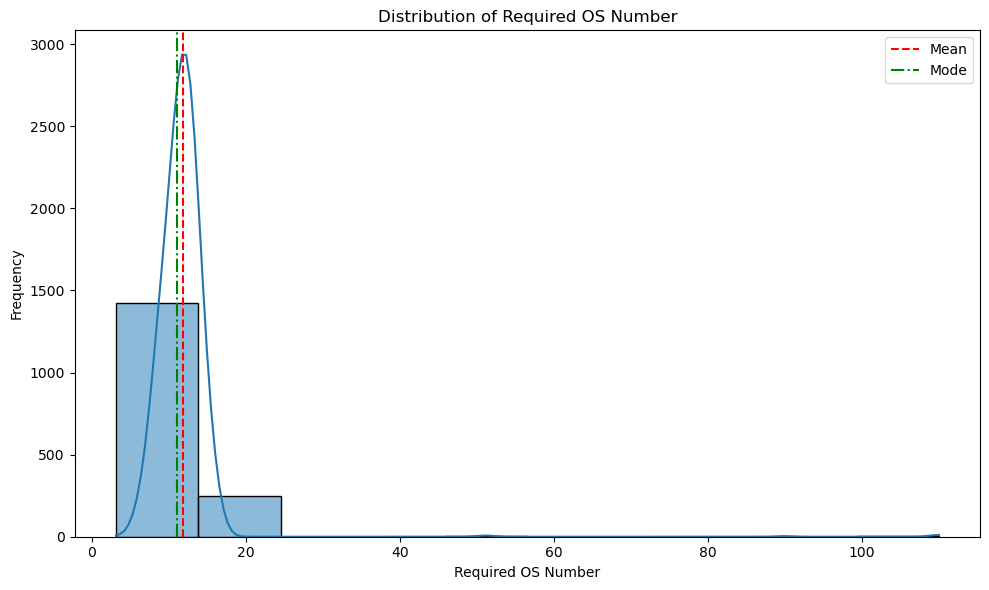

In [317]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# Filter out the unwanted value (106.6)
filtered_df = ihd_df[ihd_df['required_os_num'] != 106.6]

# Calculate mean and mode
mean_value = filtered_df['required_os_num'].mean()
mode_value = filtered_df['required_os_num'].mode().values[0]

# Create a bar plot of the distribution
plt.figure(figsize=(10, 6))

sns.histplot(data=filtered_df, x='required_os_num', bins=10, kde=True)
plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean')
plt.axvline(x=mode_value, color='g', linestyle='-.', label='Mode')
plt.xlabel('Required OS Number')
plt.ylabel('Frequency')
plt.title('Distribution of Required OS Number')
plt.legend()
plt.tight_layout()
plt.show()


In [318]:
ihd_df['required_os']

0       13.0
1       10.0
2       14.3
3       10.3
4       13.0
        ... 
1676     8.0
1677     9.0
1678    13.0
1679    13.0
1680    12.0
Name: required_os, Length: 1681, dtype: object

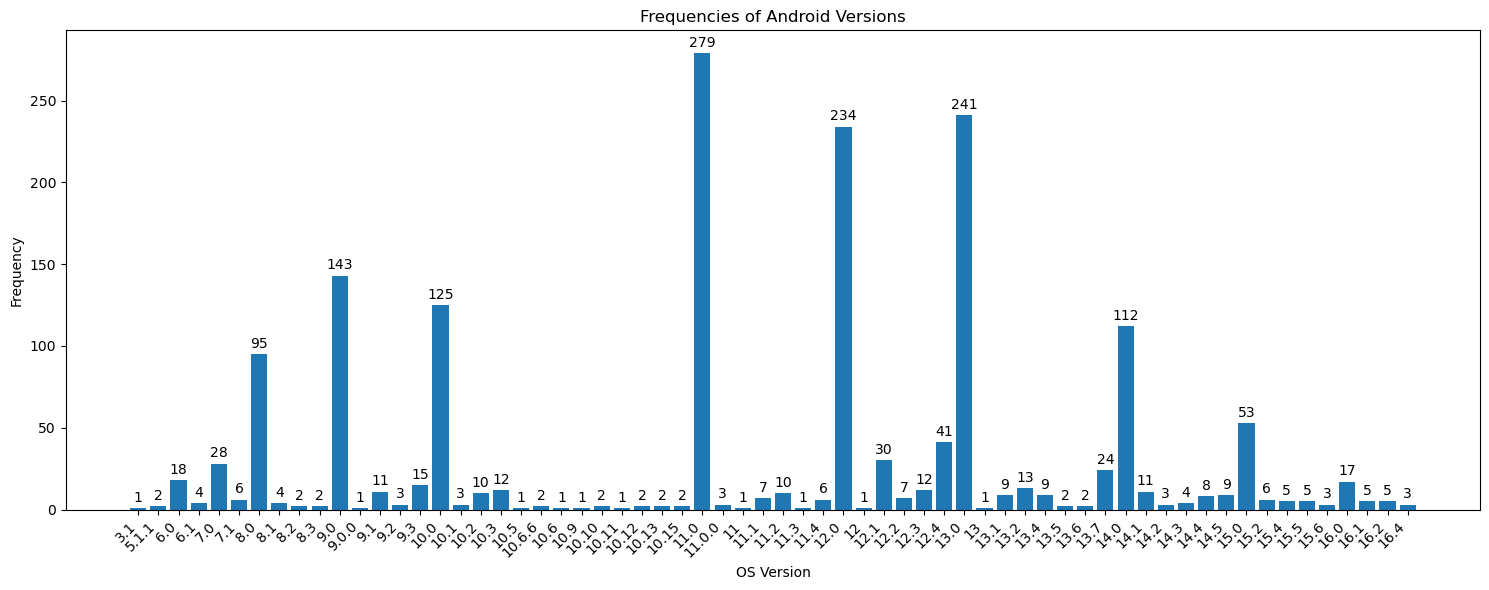

In [319]:
# import matplotlib.pyplot as plt
# import pandas as pd

# Function to convert version strings to a sortable format
def convert_to_sortable(version_str):
    version_parts = version_str.strip().split('.')
    major = int(version_parts[0])
    minor = int(version_parts[1]) if len(version_parts) > 1 else 0
    return major + minor / 100.0

# Apply the function to create a new column with sortable values
ihd_df['sortable_os'] = ihd_df['required_os'].apply(convert_to_sortable)

# Calculate value frequencies
value_counts = ihd_df['required_os'].value_counts()

# Sort the values for plotting
sorted_values = ihd_df.sort_values(by='sortable_os')['required_os']

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(sorted_values, value_counts[sorted_values])
plt.xlabel('OS Version')
plt.ylabel('Frequency')
plt.title('Frequencies of Android Versions')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its frequency
for version, freq in value_counts.items():
    plt.text(version, freq + 2, str(freq), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [320]:
ihd_df['required_os']

0       13.0
1       10.0
2       14.3
3       10.3
4       13.0
        ... 
1676     8.0
1677     9.0
1678    13.0
1679    13.0
1680    12.0
Name: required_os, Length: 1681, dtype: object

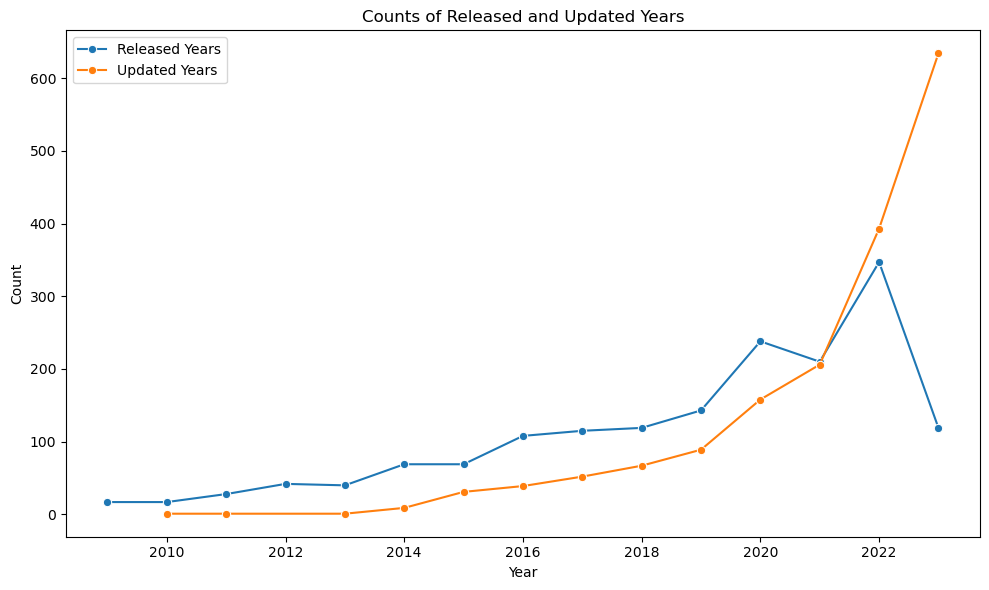

In [321]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns


# Count the occurrences of each year in the "released_year" and "updated_year" columns
released_counts = ihd_df['released_year'].value_counts().sort_index()
updated_counts = ihd_df['updated_year'].value_counts().sort_index()

# Create a line plot for released years and updated years
plt.figure(figsize=(10, 6))

# Plot released years
sns.lineplot(data=released_counts, marker='o', label='Released Years')

# Plot updated years
sns.lineplot(data=updated_counts, marker='o', label='Updated Years')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Released and Updated Years')
plt.legend()  # Display legend

plt.tight_layout()
plt.show()


### --------------------- Break Point -----------------------------

## Cluster analysis

In [1]:
#| echo: False
import pandas as pd
import glob, os, json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
from random import sample
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
from wordcloud import WordCloud
import itertools
from itertools import chain
from collections import Counter
import ast

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
import spacy

import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis
import seaborn as sns

In [2]:
folder_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps"  # Specify the folder path where your CSV files are located
file_extensions = [".csv"]  # Specify the file extensions of the files you want to load
# os.chdir(folder_path)  # Set the current working directory to the folder path

# Read the CSV file into a DataFrame
ihd_df = pd.read_csv('IHD_apple_apps.csv')

In [ ]:
ihd_df['description_monograms'] = ihd_df['description_monograms'].apply(ast.literal_eval)
ihd_df['title_monograms'] = ihd_df['title_monograms'].apply(ast.literal_eval)
ihd_df['description_bigrams'] = ihd_df['description_bigrams'].apply(ast.literal_eval)
ihd_df['title_bigrams'] = ihd_df['title_bigrams'].apply(ast.literal_eval)

ihd_df["description_monograms"]

print(ihd_df["description_monograms"].apply(type))

In [ ]:
# use description_monograms column to make the text for clustering as used n the selected_m_nonm_heartdisease.ipynb
# To make the Tokenised description column - each row into a string where words are separated by spaces
# text = [' '.join(ele) for ele in ihd_temp["text"].tolist()]
# text = [' '.join(ast.literal_eval(ele)) for ele in ihd_temp["description_monograms"].tolist()]
# Convert the "description_monograms" column to a list of strings
text = [' '.join(row) for row in ihd_df['description_monograms']]
text


In [5]:
#Using the LDA method to make clusters
#n_components = 10
#max_df=0.05
#min_df=2000
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
from gensim.models import CoherenceModel
print("Clustering based on LDA:\n")

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(lowercase=True, max_df=0.7, min_df=50, stop_words='english')
tf = tf_vectorizer.fit_transform(text)
tf_feature_names = tf_vectorizer.get_feature_names_out()

print("Running LDA:\n")
# Run LDA
lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)

print("Starting visualization:\n")
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, tf, tf_vectorizer)




Clustering based on LDA:

Running LDA:

Starting visualization:



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.061621  0.114168       1        1  46.047576
0     -0.123121 -0.091361       2        1  32.215051
2      0.184741 -0.022807       3        1  21.737372, topic_info=          Term        Freq       Total Category  logprob  loglift
386      sleep  788.000000  788.000000  Default  30.0000  30.0000
393     sounds  507.000000  507.000000  Default  29.0000  29.0000
46   breathing  392.000000  392.000000  Default  28.0000  28.0000
241    medical  645.000000  645.000000  Default  27.0000  27.0000
264      music  372.000000  372.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
41        body  186.534322  714.211474   Topic3  -4.5013   0.1836
153   features  164.160903  540.146060   Topic3  -4.6290   0.3351
426       time  176.735115  957.117963   Topic3  -4.5552  -0.1631
225       life  153.826363  549.166265   Topic3  -4.6940   0.2536
97         day  139.330240  501.237816   Topic3  -4.7930   0.2459

[180 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5         1  0.431418    access
5         2  0.502049    access
5         3  0.064904    access
6         1  0.936453   account
6         2  0.025540   account
...     ...       ...       ...
475       2  0.033768   workout
475       3  0.004824   workout
476       1  0.979072  workouts
476       2  0.017562  workouts
476       3  0.002195  workouts

[401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [6]:
# ----------------Making separate dataframes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
import pandas as pd

print("Clustering based on LDA:\n")

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(lowercase=True, max_df=0.7, min_df=50, stop_words='english')
tf = tf_vectorizer.fit_transform(text)
tf_feature_names = tf_vectorizer.get_feature_names_out()

print("Running LDA:\n")
# Run LDA
lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)

# Get the cluster assignments for each document
cluster_assignments = lda.transform(tf).argmax(axis=1)

# Add cluster assignments to the DataFrame
ihd_df['cluster'] = cluster_assignments

# Create separate DataFrames for each cluster
cluster_dataframes = []
num_clusters = lda.n_components

for cluster_label in range(num_clusters):
    cluster_df = ihd_df[ihd_df['cluster'] == cluster_label].copy()
    cluster_dataframes.append(cluster_df)

# Now cluster_dataframes will contain separate DataFrames for each cluster
# Print the number of documents in each cluster
for cluster_label, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {cluster_label}: Number of documents = {len(cluster_df)}")
    # You can also save each cluster DataFrame to a separate CSV file
    cluster_df.to_csv(f'cluster_{cluster_label}.csv', index=False)

# Cluster 0: Number of documents = 817
# Cluster 1: Number of documents = 594
# Cluster 2: Number of documents = 270

Clustering based on LDA:

Running LDA:

Cluster 0: Number of documents = 817
Cluster 1: Number of documents = 594
Cluster 2: Number of documents = 270


In [36]:
ihd_df['genres']

0                           Medical
1          Sports, Health & Fitness
2       Health & Fitness, Lifestyle
3         Medical, Health & Fitness
4         Health & Fitness, Finance
                   ...             
1676               Health & Fitness
1677             Medical, Education
1678       Health & Fitness, Sports
1679       Health & Fitness, Sports
1680                        Medical
Name: genres, Length: 1681, dtype: object

/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

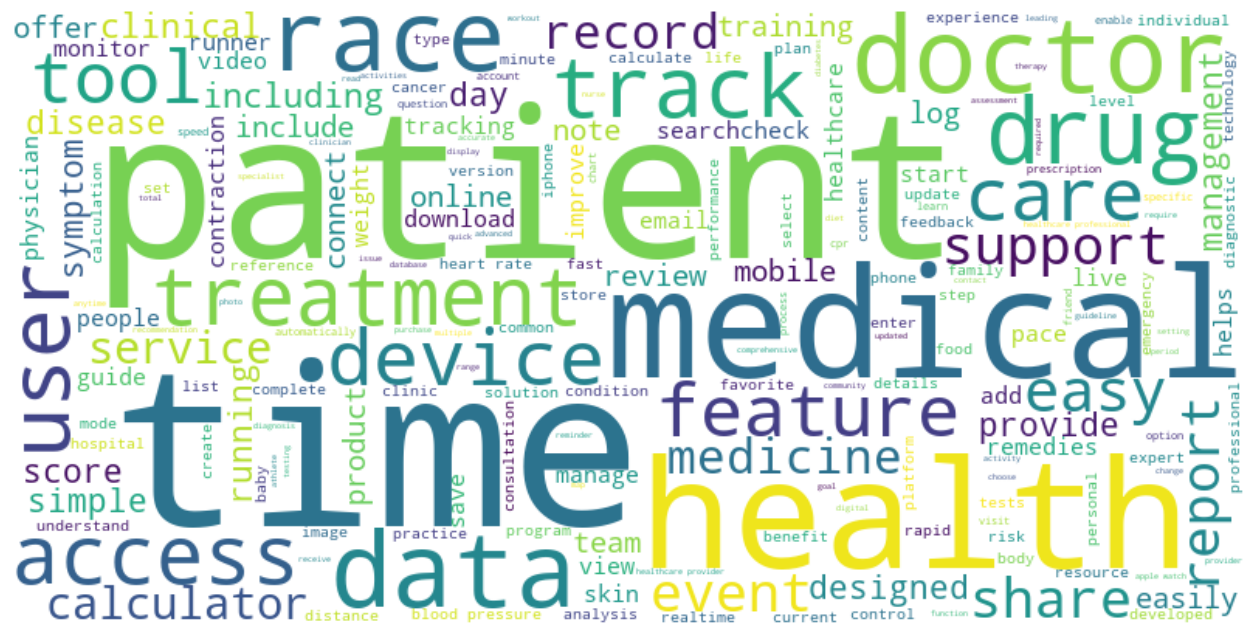

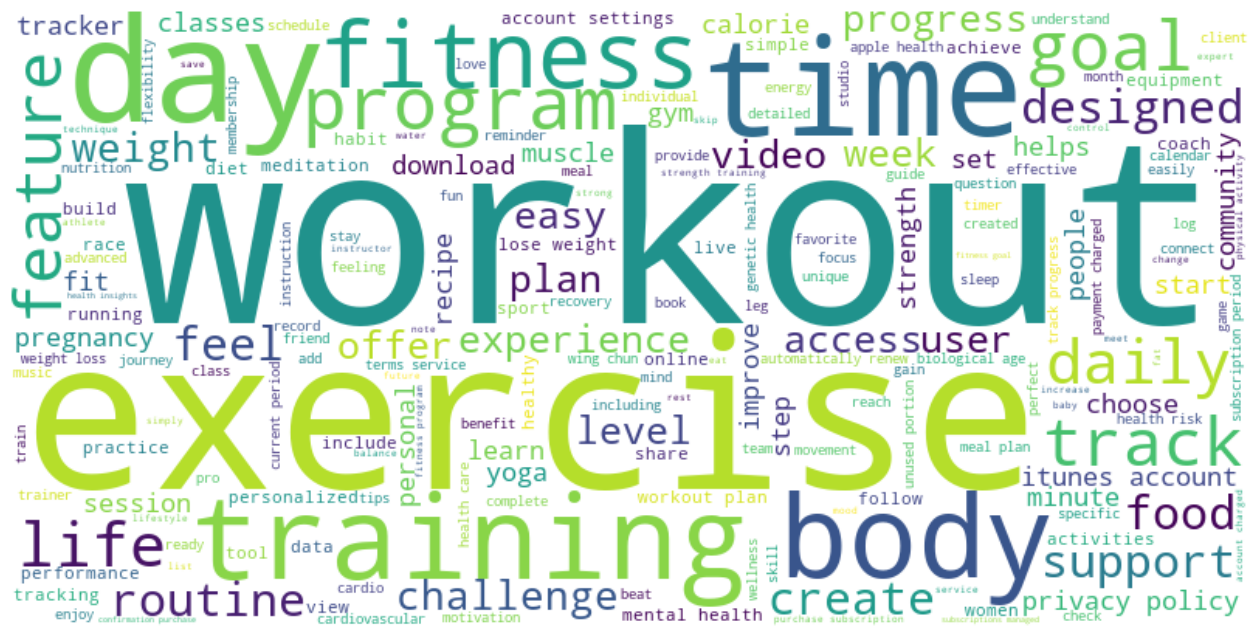

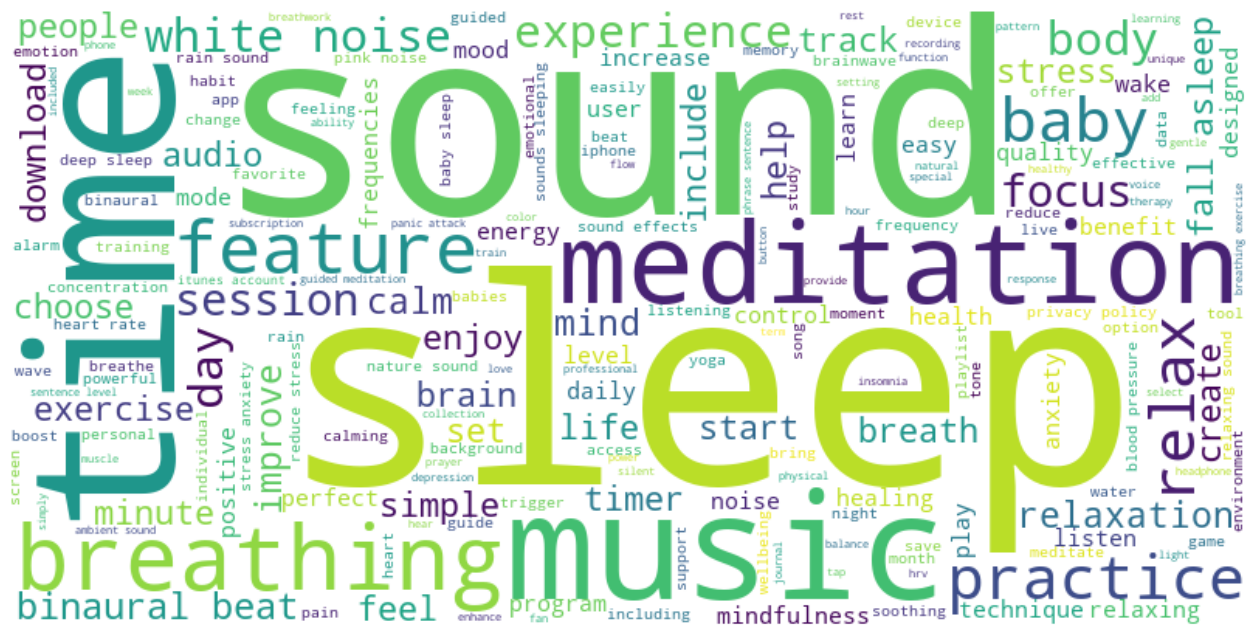

In [7]:
df1 = cluster_dataframes[0]
df2 = cluster_dataframes[1]
df3 = cluster_dataframes[2]
# df4 = cluster_dataframes[3]
df3
text2 = [' '.join(row) for row in df1['description_monograms']]
text3 = [' '.join(row) for row in df2['description_monograms']]
text4 = [' '.join(row) for row in df3['description_monograms']]
# text5 = [' '.join(row) for row in df4['description_monograms']]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text in text2 into a single string
all_text = ' '.join(text2)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Apple_cluster1.pdf')

#-------------------------------------
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Join all the text in text2 into a single string
all_text = ' '.join(text3)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Apple_cluster2.pdf')

#-------------------------------------

# Join all the text in text2 into a single string
all_text = ' '.join(text4)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Apple_cluster3.pdf')

#-------------------------------------

# # Join all the text in text2 into a single string
# all_text = ' '.join(text5)

# # Create a WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# # Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [ ]:
#### ------------SUbplots for wordclouds

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have defined the cluster_dataframes, text2, text3, and text4 variables

# Define the titles for the word clouds
wordcloud_titles = ['Clinical', 'Fitness', 'Sleep']

# Create subplots for the word clouds
fig, axes = plt.subplots(1, len(wordcloud_titles), figsize=(8.27, 5.83))

# Iterate through each title and text to create word clouds
for i, (title, text) in enumerate(zip(wordcloud_titles, [text2, text3, text4])):
    all_text = ' '.join(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=12)
    ax.axis('off')

# # Add the overall title below the plots in the center
# plt.suptitle('Apple IHD Clusters', fontsize=16, y=0.9)  # Adjust the y parameter here

# # Adjust spacing between the plots and the overall title
# plt.subplots_adjust(top=0.25)

# Adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()


In [112]:
# Join individual cluster dataframes into a single dataframe and add a column denoting cluster name

df1["Cluster"] = "Clinical"
df2["Cluster"] = "Fitness"
df3["Cluster"] = "Lifestyle"

adf = pd.concat([df1, df2, df3], ignore_index=True)

#----------------------- organising different columns---------


# Replace 'Varies with device' with NaN values in the 'size' column
adf['size'] = adf['size'].replace('Varies with device', np.nan)

def convert_to_millions(size):
    if pd.isna(size):
        return size
    return size / 1000000  # Convert size to millions

# Apply the function to the 'size' column
adf['size_mb'] = adf['size'].apply(convert_to_millions)

#---------------------------released year, updated year


# X = ihd_df[['released_year', 'updated_year', 'size_mb', 'required_os_num', 'price', 'score', 'description_length', 'genres']]
# 


# Replace the second dot and the following number
adf['required_os_num'] = adf['required_os'].str.replace(r'\.(?=.*\.)', '', regex=True).astype(float)
# Replace the second dot and the following number
adf['released_year'] = adf['released'].str[:4].astype(int)
adf['updated_year'] = adf['updated'].str[:4].astype(int)

# Plot for 'required_os_num'
def adjust_version(version):
    if pd.isnull(version):
        return version
    elif '.' not in version:
        return f'{version}.0'
    else:
        parts = version.split('.')
        if len(parts[1]) <= 1:
            return f'{parts[0]}.{parts[1]}'
        else:
            return f'{parts[0]}.{parts[1][0]}'

# Apply the function to the 'required_os' column
adf['required_os_corrected'] = adf['required_os'].apply(adjust_version)

# Convert the processed values to integers
adf['required_os_corrected'] = adf['required_os_corrected'].astype(float).astype(int)
adf["free"] = adf["price"].apply(lambda x: x==0)

adf.columns
adf.to_csv("IHD_apple_clusters.csv", index=False)

In [ ]:
# Boxplots of a few attributes
cm = 1/2.54
os.makedirs("clusters_attributes_distributions", exist_ok=True)
sns.set_theme(style="ticks")

adf["reviews"] = adf["reviews"].replace({0: np.nan})
adf["score"] = adf["score"].replace({0: np.nan})
adf["price"] = adf["price"].replace({0: np.nan})
columns = ["size_mb", "score", "reviews", "description_length", "released_year", "price", "free", "required_os_corrected"]
labels = ["Size (MB)", "Ratings score", "No. of reviews", "Description length (no. of chars)", "Released year", "Price (INR)", "Percent free apps", "iOS version"]
log_scale = [True, False, True, False, False, True, False, False]

for i, col in enumerate(columns):
    fig, ax = plt.subplots(figsize=(10*cm, 10*cm))
    if col!="free":
        sns.boxplot(data=adf, y="Cluster", x=col, whis=[10, 90], fliersize=0, color="#aaaaaa", orient="h", width=0.5, ax=ax)
        if log_scale[i]:
            ax.set_xscale('log')
        # sns.stripplot(adf, y="Cluster", x=col, size=1.5, color=".3")
    else:
        sns.barplot(adf, y="Cluster", x=col, estimator=lambda x: 100*sum(x)/len(x), width=0.5, color="#aaaaaa", edgecolor="k", errorbar=None)

    # Tweak the visual presentation
    ax.yaxis.grid(True)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("")
    sns.despine(left=True)
    plt.rcParams["font.family"] = "Times New Roman"
    fig.savefig(f"clusters_attributes_distributions/apple_{col}.pdf")


In [106]:
adf

id                         title  \
0                com.BillDirkes.QuickEM                       QuickEM   
1        Desbrina.Medicine-Tracker-Lite                Med Track Lite   
2                   ca.pharmacists.mobl                   CPS by CPhA   
3                   no.iotek.salivacode                    SalivaCODE   
4     com.escogitare.contractiontracker        My Contraction Tracker   
...                                 ...                           ...   
1676       com.auscultechdx.stillstrial                 Still's Trial   
1677           com.dozierm.reflexfinder      Misophonia Reflex Finder   
1678                       com.qms.diti     DITI Program, Joy of life   
1679                com.Allanmacair.CPR  CPR (EMERGENCY - Life Saver)   
1680                 nl.vr-lab.vrmobile  ZOLL's Virtual Rescue Mobile   

                                            description              released  \
0     QuickEM is a rapid bedside reference designed ...  2014-11-08T06:38:46Z   
1     An app for tracking your medicine list. Notifi...  2012-09-07T14:34:24Z   
2     CPS (formerly RxTx) has a new appearance. CPS ...  2011-05-27T19:27:13Z   
3     SalivaCODE™ App is used to interactively prepa...  2020-11-11T08:00:00Z   
4     My Contractions Tracker allows the mommies to ...  2012-09-05T18:35:54Z   
...                                                 ...                   ...   
1676  Still's Trial is an app to collect anonymised ...  2022-10-30T07:00:00Z   
1677  People experience misophonia as an extreme emo...  2015-04-16T14:41:45Z   
1678  DITI app handholds you throughout your journey...  2023-03-21T07:00:00Z   
1679  - Easily accessible from you wrist, keep calm ...  2016-09-08T00:25:17Z   
1680  For more than 25 years, ZOLL professional defi...  2018-07-23T08:32:44Z   

                   updated required_os required_os_2021       size  \
0     2023-03-05T01:52:44Z        13.0              NaN   24338432   
1     2017-11-01T13:29:11Z        10.3             10.3   17192960   
2     2022-11-07T15:18:15Z         9.0              9.0   93096960   
3     2022-08-01T19:07:15Z        11.0             11.0   65835008   
4     2021-04-07T18:23:19Z        12.1             12.1   11210752   
...                    ...         ...              ...        ...   
1676  2022-10-30T10:26:00Z        14.0              NaN   26413056   
1677  2019-02-04T17:20:49Z         8.0              8.0   35165184   
1678  2023-03-21T15:31:23Z        11.0              NaN   82998272   
1679  2020-01-20T16:41:50Z        10.0             10.0  130588672   
1680  2021-06-04T12:09:34Z        12.0              NaN  660131840   

        size_2021  score  ...    combined_bigram_terms  description_length  \
0             NaN    NaN  ...                       []                 945   
1      17192960.0    NaN  ...                       []                  70   
2      89977856.0    NaN  ...                       []                 898   
3     110164992.0    NaN  ...                       []                 751   
4      11210752.0    NaN  ...                       []                 757   
...           ...    ...  ...                      ...                 ...   
1676          NaN    NaN  ...    [('heart', 'murmur')]                 433   
1677   35165184.0    NaN  ...    [('short', 'breath')]                2806   
1678          NaN    NaN  ...       [('skip', 'beat')]                 495   
1679  130588672.0    NaN  ...    [('heart', 'attack')]                 476   
1680          NaN    NaN  ...  [('cardiac', 'arrest')]                1591   

      cluster    Cluster     size_mb  required_os_num released_year  \
0           0   Clinical   24.338432             13.0          2014   
1           0   Clinical   17.192960             10.3          2012   
2           0   Clinical   93.096960              9.0          2011   
3           0   Clinical   65.835008             11.0          2020   
4           0   Clinical   11.210752             12.1 

### Exploring each of the initial 3 clusters

### exploring genres of all 3 clusters

### Ignore genres for now in the clusters. If we find something else, we can incorporate

### Testing min df and max df values

# max_df=0.7, min_df=50, n_components=3 - clusters looks nice, but word clouds do not show clinical cluster well
# max_df=0.5, min_df=50, n_components=4 - is optimal and it gave good 4 clusters. 4th being the tracking and monitoring clusterm one can explore further

### Testing K-Means

/Users/keerthidubbala/opt/miniconda3/envs/healthapps/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


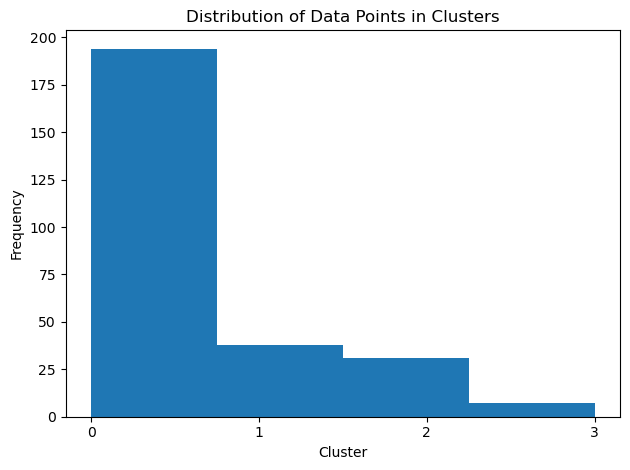

In [331]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters
num_clusters = 4

# Create a CountVectorizer
tf_vectorizer = CountVectorizer(lowercase=True, max_df=0.5, min_df=15, stop_words='english')
tf = tf_vectorizer.fit_transform(text)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tf)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the cluster distribution
plt.hist(cluster_labels, bins=num_clusters, align='mid')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Data Points in Clusters')
plt.xticks(range(num_clusters))
plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the number of clusters
num_clusters = 4

# Create a CountVectorizer
tf_vectorizer = CountVectorizer(lowercase=True, max_df=0.5, min_df=15, stop_words='english')
tf = tf_vectorizer.fit_transform(text)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tf)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Create a dictionary to store words for each cluster
cluster_words = {i: [] for i in range(num_clusters)}

# Loop through each document and its corresponding cluster label
for i, label in enumerate(cluster_labels):
    words = tf_vectorizer.inverse_transform(tf[i])[0]
    cluster_words[label].extend(words)

# Create word clouds for each cluster
for cluster, words in cluster_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} - Word Cloud')
    plt.show()


In [ ]:
## To check the evaluation metrics for different parameters of K means values, 

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans

# Assuming you have a list of parameter values to try, e.g., num_clusters_list
num_clusters_list = [2, 3, 4, 5, 6]

silhouette_scores = []
calinski_scores = []

for num_clusters in num_clusters_list:
    # Create K-Means instance
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    
    # Fit K-Means
    kmeans.fit(tf)
    
    # Get cluster assignments
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(tf, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate Calinski-Harabasz index
    calinski_score = calinski_harabasz_score(tf.toarray(), cluster_labels)
    calinski_scores.append(calinski_score)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_list, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(num_clusters_list, calinski_scores, marker='o', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Evaluating LDA clustering with evaluation metrics

### ## COuldnt find good evaluation for LDA, so we used domain knowledge and the resulting word clusters as the guidance

In [334]:
## COuldnt find good evaluation for LDA, so we used domain knowledge and the resulting word clusters as the guidance
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# from gensim.models.coherencemodel import CoherenceModel
# from gensim import corpora

# # Assuming you have a list of different parameter values to try
# num_topics_list = [5, 10, 15, 20, 25]

# # Lists to store evaluation metric scores
# perplexity_scores = []
# coherence_scores = []

# for num_topics in num_topics_list:
#     # Create CountVectorizer
#     tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
#     tf = tf_vectorizer.fit_transform(text)  # Use your processed monograms data
    
#     # Fit LDA model
#     lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5,
#                                     learning_method='online', learning_offset=50.,
#                                     random_state=0)
#     lda.fit(tf)
    
#     # Calculate perplexity
#     perplexity = lda.perplexity(tf)
#     perplexity_scores.append(perplexity)
    
#     # Convert LDA components to topic-word distributions
#     topic_word_dist = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
    
#     # Get feature names from CountVectorizer
#     feature_names = tf_vectorizer.get_feature_names_out()
    
#     # Create Gensim dictionary
#     gensim_dict = corpora.Dictionary([feature_names])
    
#     # Convert topic_word_dist to Gensim-compatible format
#     topics = []
#     for topic_dist in topic_word_dist:
#         topic = [(feature_names[i], weight) for i, weight in enumerate(topic_dist)]
#         topics.append(topic)
    
#     # Calculate coherence score using Gensim
#     coherence_model = CoherenceModel(topics=topics, texts=text, dictionary=gensim_dict, coherence='c_v')
#     coherence = coherence_model.get_coherence()
#     coherence_scores.append(coherence)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(num_topics_list, perplexity_scores, marker='o', label='Perplexity')
# plt.plot(num_topics_list, coherence_scores, marker='o', label='Coherence Score')
# plt.xlabel('Number of Topics')
# plt.ylabel('Score')
# plt.title('LDA Evaluation Metrics vs. Number of Topics')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [335]:
from gensim import corpora

# Convert your monograms data into a list of lists of tokens
tokenized_data = [doc.split() for doc in text]

# Create a Gensim dictionary
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]



In [336]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

num_topics_list = [5, 10, 15, 20, 25, 30, 35, 40]
coherence_scores = []

for num_topics in num_topics_list:
    # Train LDA model
    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics)
    
    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)


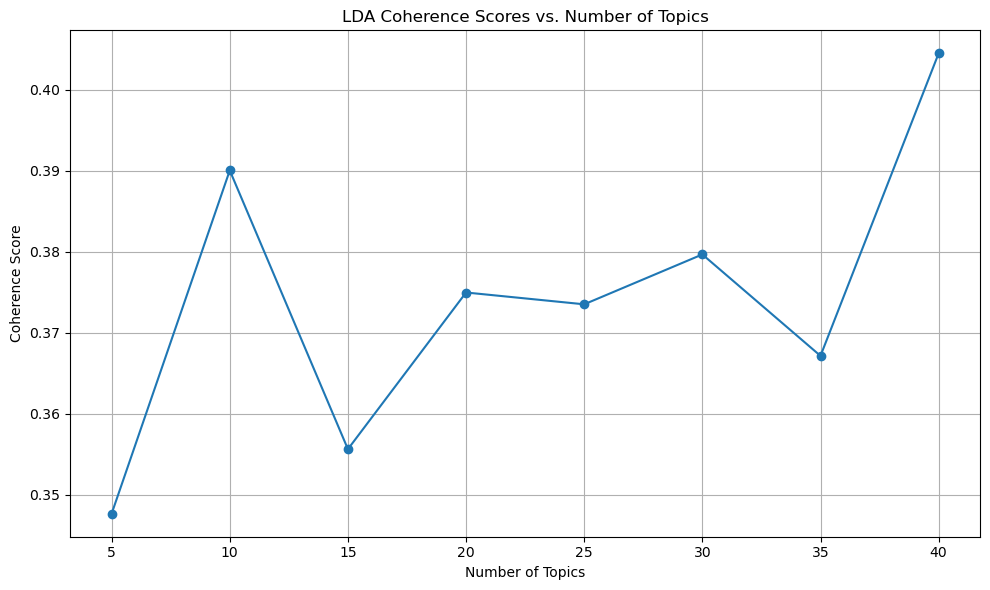

In [337]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence Scores vs. Number of Topics')
plt.grid(True)
plt.tight_layout()
plt.show()


### I deleted the gensim models, but it did not work. The resulting word clouds are very random, and not useful, in the different scenarios we used 

### This is a replacement code, its not very good, but its okay. Bottom line is that I liked LDA scikit better, and it gave good clusters

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the parameters
num_topics = 4
passes = 10
iterations = 100
random_state = 0

# Preprocess your text data and create a Gensim dictionary
# tokenized_data is a list of lists containing tokenized documents
dictionary = Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Train the LDA model
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes, iterations=iterations, random_state=random_state)

# Generate word clouds for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=20)  # Get top 20 words for the topic
    topic_words_str = ' '.join([word for word, _ in topic_words])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words_str)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx}')
    plt.show()
